### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
app_df = application_df.drop(["EIN", "NAME"], 1)
app_df.head()

/Users/bmr209/opt/anaconda3/envs/ts2/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1

In [3]:
# Determine the number of unique values in each column.
app_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = app_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

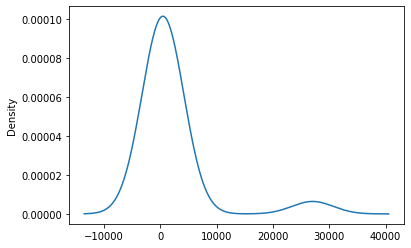

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_type_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than 500?
replace_application = list(app_type_counts[app_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    app_df.APPLICATION_TYPE = app_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
app_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts = app_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

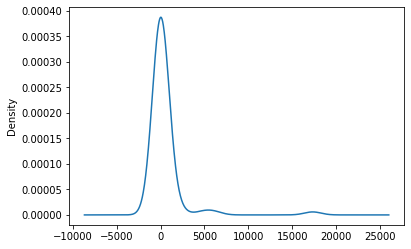

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than 1883?
replace_class = list(class_counts[class_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    app_df.CLASSIFICATION = app_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
app_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
app_cat = app_df.dtypes[app_df.dtypes == "object"].index.tolist()
app_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(app_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()

/Users/bmr209/opt/anaconda3/envs/ts2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [12]:
# Merge one-hot encoded features and drop the originals
app_df = app_df.merge(encode_df, left_index=True, right_index=True)
app_df = app_df.drop(app_cat, 1)
app_df.head()

/Users/bmr209/opt/anaconda3/envs/ts2/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 44 columns]

In [13]:
# Split our preprocessed data into our features and target arrays
y = app_df["IS_SUCCESSFUL"].values
X = app_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

/Users/bmr209/opt/anaconda3/envs/ts2/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 86 
hidden_nodes_layer2 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 86)                3784      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3480      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 7,305
Trainable params: 7,305
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Train the model
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_freq=5)

fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100

Epoch 00001: saving model to checkpoints/weights.01.hdf5
   32/25724 [..............................] - ETA: 8:29 - loss: 0.7172 - accuracy: 0.5625
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
  288/25724 [..............................] - ETA: 1:00 - loss: 0.7078 - accuracy: 0.6215
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to c

 3776/25724 [===>..........................] - ETA: 8s - loss: 0.6173 - accuracy: 0.6933
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4000/25724 [===>..........................] - ETA: 8s - loss: 0.6164 - accuracy: 0.6942
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4192/25724 [===>..........................] - ETA: 8s - loss: 0.6144 

 7584/25724 [=======>......................] - ETA: 5s - loss: 0.5870 - accuracy: 0.7168
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7840/25724 [========>.....................] - ETA: 5s - loss: 0.5873 - accuracy: 0.7161
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
15264/25724 [================>.............] - ETA: 2s - loss: 0.5770 - accuracy: 0.7193
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
15488/25724 [=================>............] - ETA: 2s - loss: 0.5769 - accuracy: 0.7195
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001

18816/25724 [====================>.........] - ETA: 1s - loss: 0.5729 - accuracy: 0.7210
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
19040/25724 [=====================>........] - ETA: 1s - loss: 0.5729 - accuracy: 0.7210
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
19264/25724 


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.5720 - accuracy: 0.7201
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
22944/25724 [=========================>....] - ETA: 0s - loss: 0.5723 - accuracy: 0.7200
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
  704/25724 [..............................] - ETA: 6s - loss: 0.5370 - accuracy: 0.7500
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
  896/25724 [>.............................] - ETA: 6s - loss: 0.5318 - accuracy: 0.7600
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 4480/25724 [====>.........................] - ETA: 4s - loss: 0.5522 - accuracy: 0.7292
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 4736/25724 [====>.........................] - ETA: 4s - loss: 0.5534 - accuracy: 0.7274
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 8256/25724 [========>.....................] - ETA: 3s - loss: 0.5602 - accuracy: 0.7249
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 8512/25724 [========>.....................] - ETA: 3s - loss: 0.5614 - accuracy: 0.7247
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
12032/25724 [=============>................] - ETA: 3s - loss: 0.5584 - accuracy: 0.7284
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
12256/25724 [=============>................] - ETA: 3s - loss: 0.5579 - accuracy: 0.7287
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
15712/25724 [=================>............] - ETA: 2s - loss: 0.5563 - accuracy: 0.7292
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
15936/25724 [=================>............] - ETA: 2s - loss: 0.5561 - accuracy: 0.7294
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002

22976/25724 [=========================>....] - ETA: 0s - loss: 0.5575 - accuracy: 0.7275
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
23200/25724 [==========================>...] - ETA: 0s - loss: 0.5574 - accuracy: 0.7274
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 1088/25724 [>.............................] - ETA: 6s - loss: 0.5452 - accuracy: 0.7289
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 1344/25724 [>.............................] - ETA: 5s - loss: 0.5537 - accuracy: 0.7292
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003

 4768/25724 [====>.........................] - ETA: 4s - loss: 0.5544 - accuracy: 0.7257
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5024/25724 [====>.........................] - ETA: 4s - loss: 0.5523 - accuracy: 0.7269
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8640/25724 [=========>....................] - ETA: 3s - loss: 0.5550 - accuracy: 0.7247
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8864/25724 [=========>....................] - ETA: 3s - loss: 0.5543 - accuracy: 0.7255
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
12352/25724 [=============>................] - ETA: 3s - loss: 0.5542 - accuracy: 0.7266
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
12576/25724 [=============>................] - ETA: 3s - loss: 0.5538 - accuracy: 0.7273
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
16032/25724 [=================>............] - ETA: 2s - loss: 0.5518 - accuracy: 0.7304
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
16256/25724 [=================>............] - ETA: 2s - loss: 0.5515 - accuracy: 0.7309
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003

23264/25724 [==========================>...] - ETA: 0s - loss: 0.5513 - accuracy: 0.7313
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
23456/25724 [==========================>...] - ETA: 0s - loss: 0.5518 - accuracy: 0.7305
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5518 


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 1312/25724 [>.............................] - ETA: 6s - loss: 0.5463 - accuracy: 0.7348
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 1504/25724 [>.............................] - ETA: 6s - loss: 0.5449 - accuracy: 0.7367
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 5056/25724 [====>.........................] - ETA: 5s - loss: 0.5520 - accuracy: 0.7342
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 5280/25724 [=====>........................] - ETA: 5s - loss: 0.5522 - accuracy: 0.7341
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 8704/25724 [=========>....................] - ETA: 4s - loss: 0.5485 - accuracy: 0.7354
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 8928/25724 [=========>....................] - ETA: 4s - loss: 0.5480 - accuracy: 0.7356
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004

12416/25724 [=============>................] - ETA: 4s - loss: 0.5496 - accuracy: 0.7336
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
12640/25724 [=============>................] - ETA: 4s - loss: 0.5496 - accuracy: 0.7340
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
12832/25724 [=============>................] - ETA: 4s - loss: 0.5492 


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
16192/25724 [=================>............] - ETA: 2s - loss: 0.5488 - accuracy: 0.7325
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
16416/25724 [==================>...........] - ETA: 2s - loss: 0.5498 - accuracy: 0.7319
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004


Epoch 00004: saving model to checkpoints/weights.04.hdf5
19808/25724 [======================>.......] - ETA: 1s - loss: 0.5508 - accuracy: 0.7315
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
20000/25724 [======================>.......] - ETA: 1s - loss: 0.5511 - accuracy: 0.7315
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
20224/25724 

23392/25724 [==========================>...] - ETA: 0s - loss: 0.5515 - accuracy: 0.7314
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.5514 - accuracy: 0.7315
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
23776/25724 [==========================>...] - ETA: 0s - loss: 0.5516 - accuracy: 0.7313
Epoch 00004: saving model to checkpoint

 4864/25724 [====>.........................] - ETA: 5s - loss: 0.5484 - accuracy: 0.7276
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 5088/25724 [====>.........................] - ETA: 5s - loss: 0.5468 - accuracy: 0.7286
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 5280/25724 [=====>........................] - ETA: 5s - loss: 0.5472 

 8512/25724 [========>.....................] - ETA: 4s - loss: 0.5500 - accuracy: 0.7256
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 8704/25724 [=========>....................] - ETA: 4s - loss: 0.5503 - accuracy: 0.7258
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 8896/25724 [=========>....................] - ETA: 4s - loss: 0.5505 - accuracy: 0.7252
Epoch 00005: saving model to checkpoint


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
16064/25724 [=================>............] - ETA: 2s - loss: 0.5508 - accuracy: 0.7291
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
16288/25724 [=================>............] - ETA: 2s - loss: 0.5508 - accuracy: 0.7291
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005

19648/25724 [=====================>........] - ETA: 1s - loss: 0.5496 - accuracy: 0.7303
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
19840/25724 [======================>.......] - ETA: 1s - loss: 0.5497 - accuracy: 0.7303
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
20000/25724 [======================>.......] - ETA: 1s - loss: 0.5496 - accuracy: 0.7305
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoint


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
23456/25724 [==========================>...] - ETA: 0s - loss: 0.5488 - accuracy: 0.7312
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5488 - accuracy: 0.7315
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005


Epoch 00006: saving model to checkpoints/weights.06.hdf5
 4960/25724 [====>.........................] - ETA: 5s - loss: 0.5409 - accuracy: 0.7329
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 5152/25724 [=====>........................] - ETA: 5s - loss: 0.5426 - accuracy: 0.7323
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 5376/25724 

 8672/25724 [=========>....................] - ETA: 4s - loss: 0.5479 - accuracy: 0.7284
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 8864/25724 [=========>....................] - ETA: 4s - loss: 0.5474 - accuracy: 0.7289
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 9024/25724 [=========>....................] - ETA: 4s - loss: 0.5486 - accuracy: 0.7279
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoint


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
12480/25724 [=============>................] - ETA: 3s - loss: 0.5490 - accuracy: 0.7272
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
12704/25724 [=============>................] - ETA: 3s - loss: 0.5486 - accuracy: 0.7280
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
16256/25724 [=================>............] - ETA: 2s - loss: 0.5463 - accuracy: 0.7314
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
16512/25724 [==================>...........] - ETA: 2s - loss: 0.5464 - accuracy: 0.7316
Epoch 00006


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
19936/25724 [======================>.......] - ETA: 1s - loss: 0.5449 - accuracy: 0.7338
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
20160/25724 [======================>.......] - ETA: 1s - loss: 0.5450 - accuracy: 0.7339
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006

23552/25724 [==========================>...] - ETA: 0s - loss: 0.5475 - accuracy: 0.7315
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
23776/25724 [==========================>...] - ETA: 0s - loss: 0.5479 - accuracy: 0.7311
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006


Epoch 00007: saving model to checkpoints/weights.07.hdf5
 1504/25724 [>.............................] - ETA: 6s - loss: 0.5383 - accuracy: 0.7400
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 1760/25724 [=>............................] - ETA: 6s - loss: 0.5421 - accuracy: 0.7369
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007


Epoch 00007: saving model to checkpoints/weights.07.hdf5
 5216/25724 [=====>........................] - ETA: 5s - loss: 0.5472 - accuracy: 0.7314
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 5440/25724 [=====>........................] - ETA: 5s - loss: 0.5472 - accuracy: 0.7316
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007

 8896/25724 [=========>....................] - ETA: 4s - loss: 0.5475 - accuracy: 0.7324
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9152/25724 [=========>....................] - ETA: 4s - loss: 0.5479 - accuracy: 0.7322
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007


Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
12704/25724 [=============>................] - ETA: 3s - loss: 0.5461 - accuracy: 0.7333
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
12928/25724 [==============>...............] - ETA: 3s - loss: 0.5456 - accuracy: 0.7335
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007


Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
16448/25724 [==================>...........] - ETA: 2s - loss: 0.5465 - accuracy: 0.7324
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
16672/25724 [==================>...........] - ETA: 2s - loss: 0.5469 - accuracy: 0.7320
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007


Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
20160/25724 [======================>.......] - ETA: 1s - loss: 0.5460 - accuracy: 0.7328
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
20416/25724 [======================>.......] - ETA: 1s - loss: 0.5463 - accuracy: 0.7329
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 1728/25724 [=>............................] - ETA: 7s - loss: 0.5305 - accuracy: 0.7459
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 1952/25724 [=>............................] - ETA: 6s - loss: 0.5362 - accuracy: 0.7423
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 5344/25724 [=====>........................] - ETA: 5s - loss: 0.5444 - accuracy: 0.7333
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 5568/25724 [=====>........................] - ETA: 5s - loss: 0.5458 - accuracy: 0.7315
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008


Epoch 00008: saving model to checkpoints/weights.08.hdf5
 9024/25724 [=========>....................] - ETA: 4s - loss: 0.5441 - accuracy: 0.7366
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 9216/25724 [=========>....................] - ETA: 4s - loss: 0.5425 - accuracy: 0.7384
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
16480/25724 [==================>...........] - ETA: 2s - loss: 0.5445 - accuracy: 0.7351
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
16704/25724 [==================>...........] - ETA: 2s - loss: 0.5441 - accuracy: 0.7357
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
20288/25724 [======================>.......] - ETA: 1s - loss: 0.5450 - accuracy: 0.7346
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
20512/25724 [======================>.......] - ETA: 1s - loss: 0.5451 - accuracy: 0.7341
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 0.5462 - accuracy: 0.7325
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.5463 - accuracy: 0.7323
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008

 1888/25724 [=>............................] - ETA: 5s - loss: 0.5538 - accuracy: 0.7325
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 2080/25724 [=>............................] - ETA: 5s - loss: 0.5545 - accuracy: 0.7317
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 2272/25724 [=>............................] - ETA: 5s - loss: 0.5508 - accuracy: 0.7333
Epoch 00009: saving model to checkpoint


Epoch 00009: saving model to checkpoints/weights.09.hdf5
 5632/25724 [=====>........................] - ETA: 4s - loss: 0.5429 - accuracy: 0.7369
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 5856/25724 [=====>........................] - ETA: 4s - loss: 0.5438 - accuracy: 0.7360
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009


Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 9408/25724 [=========>....................] - ETA: 3s - loss: 0.5416 - accuracy: 0.7394
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 9632/25724 [==========>...................] - ETA: 3s - loss: 0.5422 - accuracy: 0.7384
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009


Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
16832/25724 [==================>...........] - ETA: 2s - loss: 0.5468 - accuracy: 0.7326
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
17056/25724 [==================>...........] - ETA: 2s - loss: 0.5464 - accuracy: 0.7329
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009


Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
20576/25724 [======================>.......] - ETA: 1s - loss: 0.5471 - accuracy: 0.7324
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
20800/25724 [=======================>......] - ETA: 1s - loss: 0.5472 - accuracy: 0.7325
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009

 2112/25724 [=>............................] - ETA: 5s - loss: 0.5443 - accuracy: 0.7330
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 2336/25724 [=>............................] - ETA: 5s - loss: 0.5480 - accuracy: 0.7307
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 2560/25724 


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 6016/25724 [======>.......................] - ETA: 4s - loss: 0.5380 - accuracy: 0.7377
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 6240/25724 [======>.......................] - ETA: 4s - loss: 0.5380 - accuracy: 0.7388
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 9664/25724 [==========>...................] - ETA: 3s - loss: 0.5410 - accuracy: 0.7345
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 9856/25724 [==========>...................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7352
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 9984/25724 [==========>...................] - ETA: 3s - loss: 0.5403 

13280/25724 [==============>...............] - ETA: 2s - loss: 0.5457 - accuracy: 0.7312
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
13472/25724 [==============>...............] - ETA: 2s - loss: 0.5464 - accuracy: 0.7307
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
13696/25724 [==============>...............] - ETA: 2s - loss: 0.5467 

16992/25724 [==================>...........] - ETA: 2s - loss: 0.5437 - accuracy: 0.7331
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
17216/25724 [===================>..........] - ETA: 2s - loss: 0.5437 - accuracy: 0.7330
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
17440/25724 


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
20896/25724 [=======================>......] - ETA: 1s - loss: 0.5438 - accuracy: 0.7328
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
21120/25724 [=======================>......] - ETA: 1s - loss: 0.5443 - accuracy: 0.7327
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010


Epoch 00010: saving model to checkpoints/weights.10.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.5449 - accuracy: 0.7331
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5453 - accuracy: 0.7330
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010


Epoch 00011: saving model to checkpoints/weights.11.hdf5
 2400/25724 [=>............................] - ETA: 5s - loss: 0.5448 - accuracy: 0.7421
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 2592/25724 [==>...........................] - ETA: 5s - loss: 0.5429 - accuracy: 0.7427
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 2816/25724 

 6080/25724 [======>.......................] - ETA: 4s - loss: 0.5393 - accuracy: 0.7418
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 6304/25724 [======>.......................] - ETA: 4s - loss: 0.5398 - accuracy: 0.7410
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 6528/25724 


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 9920/25724 [==========>...................] - ETA: 3s - loss: 0.5435 - accuracy: 0.7389
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
10176/25724 [==========>...................] - ETA: 3s - loss: 0.5428 - accuracy: 0.7401
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
17408/25724 [===================>..........] - ETA: 1s - loss: 0.5450 - accuracy: 0.7364
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
17632/25724 [===================>..........] - ETA: 1s - loss: 0.5449 - accuracy: 0.7362
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
21056/25724 [=======================>......] - ETA: 1s - loss: 0.5474 - accuracy: 0.7339
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
21312/25724 [=======================>......] - ETA: 1s - loss: 0.5477 - accuracy: 0.7338
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 0.5456 - accuracy: 0.7355
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.5453 - accuracy: 0.7357
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011


Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2720/25724 [==>...........................] - ETA: 5s - loss: 0.5436 - accuracy: 0.7250
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2976/25724 [==>...........................] - ETA: 5s - loss: 0.5439 - accuracy: 0.7261
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 6496/25724 [======>.......................] - ETA: 4s - loss: 0.5447 - accuracy: 0.7301
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 6752/25724 [======>.......................] - ETA: 4s - loss: 0.5463 - accuracy: 0.7294
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012


Epoch 00012: saving model to checkpoints/weights.12.hdf5
10176/25724 [==========>...................] - ETA: 3s - loss: 0.5398 - accuracy: 0.7349
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
10400/25724 [===========>..................] - ETA: 3s - loss: 0.5386 - accuracy: 0.7356
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
13984/25724 [===============>..............] - ETA: 2s - loss: 0.5409 - accuracy: 0.7364
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
14208/25724 [===============>..............] - ETA: 2s - loss: 0.5412 - accuracy: 0.7359
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
17664/25724 [===================>..........] - ETA: 1s - loss: 0.5431 - accuracy: 0.7353
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
17888/25724 [===================>..........] - ETA: 1s - loss: 0.5440 - accuracy: 0.7343
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
21536/25724 [========================>.....] - ETA: 0s - loss: 0.5458 - accuracy: 0.7337
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 0.5463 - accuracy: 0.7330
Epoch 00012


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.5447 - accuracy: 0.7341
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.5449 - accuracy: 0.7339
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 3232/25724 [==>...........................] - ETA: 5s - loss: 0.5383 - accuracy: 0.7330
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 3456/25724 [===>..........................] - ETA: 5s - loss: 0.5402 - accuracy: 0.7318
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013

 6816/25724 [======>.......................] - ETA: 4s - loss: 0.5378 - accuracy: 0.7375
Epoch 00013: saving model to checkpoints/weights.13.hdf5
 6848/25724 [======>.......................] - ETA: 4s - loss: 0.5381 - accuracy: 0.7379
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 7040/25724 [=======>......................] - ETA: 4s - loss: 0.5393 - accuracy: 0.7369
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoint


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
10624/25724 [===========>..................] - ETA: 3s - loss: 0.5442 - accuracy: 0.7332
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
10880/25724 [===========>..................] - ETA: 3s - loss: 0.5445 - accuracy: 0.7329
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
14432/25724 [===============>..............] - ETA: 2s - loss: 0.5457 - accuracy: 0.7316
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
14656/25724 [================>.............] - ETA: 2s - loss: 0.5461 - accuracy: 0.7310
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
18080/25724 [====================>.........] - ETA: 1s - loss: 0.5453 - accuracy: 0.7324
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
18304/25724 [====================>.........] - ETA: 1s - loss: 0.5446 - accuracy: 0.7326
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
21856/25724 [========================>.....] - ETA: 0s - loss: 0.5449 - accuracy: 0.7331
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
22080/25724 [========================>.....] - ETA: 0s - loss: 0.5445 - accuracy: 0.7335
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
25664/25724 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7353
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
25724/25724 [==============================] - 6s 235us/sample - loss: 0.5445 - accuracy: 0.7350
Epoch 14/100

Epoch 00014: saving model to checkpoints/weights.14.hdf5
   32/25724 [..............................] - ETA: 6s - loss: 0.3671 - accuracy: 0.9375
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: savi


Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 3616/25724 [===>..........................] - ETA: 5s - loss: 0.5463 - accuracy: 0.7298
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 3840/25724 [===>..........................] - ETA: 4s - loss: 0.5439 - accuracy: 0.7326
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014

 7296/25724 [=======>......................] - ETA: 4s - loss: 0.5421 - accuracy: 0.7340
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 7552/25724 [=======>......................] - ETA: 4s - loss: 0.5427 - accuracy: 0.7332
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014


Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
11136/25724 [===========>..................] - ETA: 3s - loss: 0.5423 - accuracy: 0.7332
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
11392/25724 [============>.................] - ETA: 3s - loss: 0.5436 - accuracy: 0.7321
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014


Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
14880/25724 [================>.............] - ETA: 2s - loss: 0.5463 - accuracy: 0.7315
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
15104/25724 [================>.............] - ETA: 2s - loss: 0.5460 - accuracy: 0.7319
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014


Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
18656/25724 [====================>.........] - ETA: 1s - loss: 0.5448 - accuracy: 0.7326
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
18880/25724 [=====================>........] - ETA: 1s - loss: 0.5450 - accuracy: 0.7326
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014


Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
22432/25724 [=========================>....] - ETA: 0s - loss: 0.5433 - accuracy: 0.7345
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5436 - accuracy: 0.7343
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014

 3968/25724 [===>..........................] - ETA: 4s - loss: 0.5515 - accuracy: 0.7273
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 4160/25724 [===>..........................] - ETA: 4s - loss: 0.5506 - accuracy: 0.7291
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 4384/25724 [====>.........................] - ETA: 4s - loss: 0.5499 


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 7776/25724 [========>.....................] - ETA: 4s - loss: 0.5486 - accuracy: 0.7288
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 8032/25724 [========>.....................] - ETA: 4s - loss: 0.5494 - accuracy: 0.7282
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
11648/25724 [============>.................] - ETA: 3s - loss: 0.5476 - accuracy: 0.7315
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
11904/25724 [============>.................] - ETA: 3s - loss: 0.5471 - accuracy: 0.7321
Epoch 00015


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
15392/25724 [================>.............] - ETA: 2s - loss: 0.5482 - accuracy: 0.7302
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
15648/25724 [=================>............] - ETA: 2s - loss: 0.5476 - accuracy: 0.7307
Epoch 00015


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
19104/25724 [=====================>........] - ETA: 1s - loss: 0.5467 - accuracy: 0.7316
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
19328/25724 [=====================>........] - ETA: 1s - loss: 0.5467 - accuracy: 0.7316
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
22848/25724 [=========================>....] - ETA: 0s - loss: 0.5452 - accuracy: 0.7336
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
23104/25724 [=========================>....] - ETA: 0s - loss: 0.5452 - accuracy: 0.7335
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
  736/25724 [..............................] - ETA: 5s - loss: 0.5411 - accuracy: 0.7391
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
  928/25724 [>.............................] - ETA: 5s - loss: 0.5411 - accuracy: 0.7425
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 4512/25724 [====>.........................] - ETA: 4s - loss: 0.5370 - accuracy: 0.7363
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 4704/25724 [====>.........................] - ETA: 4s - loss: 0.5383 - accuracy: 0.7351
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8224/25724 [========>.....................] - ETA: 4s - loss: 0.5477 - accuracy: 0.7308
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8448/25724 [========>.....................] - ETA: 4s - loss: 0.5477 - accuracy: 0.7302
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016

11840/25724 [============>.................] - ETA: 3s - loss: 0.5494 - accuracy: 0.7281
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
12032/25724 [=============>................] - ETA: 3s - loss: 0.5489 - accuracy: 0.7289
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
12224/25724 [=============>................] - ETA: 3s - loss: 0.5494 - accuracy: 0.7286
Epoch 00016: saving model to checkpoint

19136/25724 [=====================>........] - ETA: 1s - loss: 0.5449 - accuracy: 0.7324
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
19360/25724 [=====================>........] - ETA: 1s - loss: 0.5455 - accuracy: 0.7318
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
19584/25724 


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
22880/25724 [=========================>....] - ETA: 0s - loss: 0.5434 - accuracy: 0.7348
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
23104/25724 [=========================>....] - ETA: 0s - loss: 0.5438 - accuracy: 0.7344
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016

  704/25724 [..............................] - ETA: 6s - loss: 0.5527 - accuracy: 0.7145
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
  928/25724 [>.............................] - ETA: 6s - loss: 0.5593 - accuracy: 0.7112
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 1152/25724 


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 4480/25724 [====>.........................] - ETA: 5s - loss: 0.5513 - accuracy: 0.7270
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 4704/25724 [====>.........................] - ETA: 5s - loss: 0.5494 - accuracy: 0.7285
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 8288/25724 [========>.....................] - ETA: 4s - loss: 0.5457 - accuracy: 0.7311
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 8512/25724 [========>.....................] - ETA: 4s - loss: 0.5462 - accuracy: 0.7310
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
12000/25724 [============>.................] - ETA: 3s - loss: 0.5428 - accuracy: 0.7326
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
12224/25724 [=============>................] - ETA: 3s - loss: 0.5435 - accuracy: 0.7318
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
15680/25724 [=================>............] - ETA: 2s - loss: 0.5453 - accuracy: 0.7317
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
15904/25724 [=================>............] - ETA: 2s - loss: 0.5448 - accuracy: 0.7323
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017

22912/25724 [=========================>....] - ETA: 0s - loss: 0.5431 - accuracy: 0.7345
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
23136/25724 [=========================>....] - ETA: 0s - loss: 0.5429 - accuracy: 0.7345
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
23360/25724 


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
  928/25724 [>.............................] - ETA: 6s - loss: 0.5311 - accuracy: 0.7381
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 1152/25724 [>.............................] - ETA: 5s - loss: 0.5281 - accuracy: 0.7352
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018


Epoch 00018: saving model to checkpoints/weights.18.hdf5
 4512/25724 [====>.........................] - ETA: 5s - loss: 0.5448 - accuracy: 0.7334
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 4736/25724 [====>.........................] - ETA: 5s - loss: 0.5467 - accuracy: 0.7321
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018


Epoch 00018: saving model to checkpoints/weights.18.hdf5
 8224/25724 [========>.....................] - ETA: 4s - loss: 0.5418 - accuracy: 0.7348
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 8448/25724 [========>.....................] - ETA: 4s - loss: 0.5434 - accuracy: 0.7337
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 8608/25724 [=========>....................] - ETA: 4s - loss: 0.5435 


Epoch 00018: saving model to checkpoints/weights.18.hdf5
11936/25724 [============>.................] - ETA: 3s - loss: 0.5412 - accuracy: 0.7346
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
12160/25724 [=============>................] - ETA: 3s - loss: 0.5415 - accuracy: 0.7339
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
15712/25724 [=================>............] - ETA: 2s - loss: 0.5413 - accuracy: 0.7339
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
15936/25724 [=================>............] - ETA: 2s - loss: 0.5410 - accuracy: 0.7342
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
19520/25724 [=====================>........] - ETA: 1s - loss: 0.5431 - accuracy: 0.7343
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
19744/25724 [======================>.......] - ETA: 1s - loss: 0.5431 - accuracy: 0.7343
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018

23104/25724 [=========================>....] - ETA: 0s - loss: 0.5431 - accuracy: 0.7337
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
23328/25724 [==========================>...] - ETA: 0s - loss: 0.5427 - accuracy: 0.7341
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
23552/25724 


Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 1152/25724 [>.............................] - ETA: 5s - loss: 0.5426 - accuracy: 0.7387
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 1376/25724 [>.............................] - ETA: 5s - loss: 0.5489 - accuracy: 0.7340
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019


Epoch 00019: saving model to checkpoints/weights.19.hdf5
 4768/25724 [====>.........................] - ETA: 5s - loss: 0.5485 - accuracy: 0.7311
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 4992/25724 [====>.........................] - ETA: 5s - loss: 0.5458 - accuracy: 0.7330
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019


Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 8512/25724 [========>.....................] - ETA: 4s - loss: 0.5498 - accuracy: 0.7311
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 8736/25724 [=========>....................] - ETA: 4s - loss: 0.5494 - accuracy: 0.7315
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019

15744/25724 [=================>............] - ETA: 2s - loss: 0.5474 - accuracy: 0.7330
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
15936/25724 [=================>............] - ETA: 2s - loss: 0.5477 - accuracy: 0.7326
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
16160/25724 [=================>............] - ETA: 2s - loss: 0.5487 

19456/25724 [=====================>........] - ETA: 1s - loss: 0.5454 - accuracy: 0.7347
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
19680/25724 [=====================>........] - ETA: 1s - loss: 0.5452 - accuracy: 0.7345
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019


Epoch 00020: saving model to checkpoints/weights.20.hdf5
 1120/25724 [>.............................] - ETA: 5s - loss: 0.5473 - accuracy: 0.7339
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 1376/25724 [>.............................] - ETA: 5s - loss: 0.5471 - accuracy: 0.7289
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 4896/25724 [====>.........................] - ETA: 4s - loss: 0.5470 - accuracy: 0.7288
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 5120/25724 [====>.........................] - ETA: 4s - loss: 0.5466 - accuracy: 0.7301
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020

 8576/25724 [=========>....................] - ETA: 3s - loss: 0.5471 - accuracy: 0.7282
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 8800/25724 [=========>....................] - ETA: 3s - loss: 0.5473 - accuracy: 0.7276
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 9024/25724 


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
12352/25724 [=============>................] - ETA: 3s - loss: 0.5433 - accuracy: 0.7338
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
12608/25724 [=============>................] - ETA: 3s - loss: 0.5435 - accuracy: 0.7335
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020


Epoch 00020: saving model to checkpoints/weights.20.hdf5
16032/25724 [=================>............] - ETA: 2s - loss: 0.5410 - accuracy: 0.7357
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
16256/25724 [=================>............] - ETA: 2s - loss: 0.5407 - accuracy: 0.7360
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
19776/25724 [======================>.......] - ETA: 1s - loss: 0.5438 - accuracy: 0.7340
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
20000/25724 [======================>.......] - ETA: 1s - loss: 0.5435 - accuracy: 0.7340
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.5417 - accuracy: 0.7366
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5420 - accuracy: 0.7362
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 5280/25724 [=====>........................] - ETA: 4s - loss: 0.5432 - accuracy: 0.7381
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 5536/25724 [=====>........................] - ETA: 4s - loss: 0.5445 - accuracy: 0.7363
Epoch 00021


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 8992/25724 [=========>....................] - ETA: 3s - loss: 0.5417 - accuracy: 0.7362
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 9216/25724 [=========>....................] - ETA: 3s - loss: 0.5419 - accuracy: 0.7358
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021

16288/25724 [=================>............] - ETA: 2s - loss: 0.5403 - accuracy: 0.7368
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
16512/25724 [==================>...........] - ETA: 2s - loss: 0.5403 - accuracy: 0.7367
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021


Epoch 00021: saving model to checkpoints/weights.21.hdf5
23776/25724 [==========================>...] - ETA: 0s - loss: 0.5425 - accuracy: 0.7352
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.5423 - accuracy: 0.7359
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 1792/25724 [=>............................] - ETA: 5s - loss: 0.5343 - accuracy: 0.7439
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 2048/25724 [=>............................] - ETA: 5s - loss: 0.5382 - accuracy: 0.7407
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 5568/25724 [=====>........................] - ETA: 4s - loss: 0.5366 - accuracy: 0.7414
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 5792/25724 [=====>........................] - ETA: 4s - loss: 0.5370 - accuracy: 0.7412
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022

 9152/25724 [=========>....................] - ETA: 3s - loss: 0.5383 - accuracy: 0.7398
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 9376/25724 [=========>....................] - ETA: 3s - loss: 0.5372 - accuracy: 0.7408
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 9600/25724 


Epoch 00022: saving model to checkpoints/weights.22.hdf5
12896/25724 [==============>...............] - ETA: 3s - loss: 0.5375 - accuracy: 0.7418
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
13056/25724 [==============>...............] - ETA: 2s - loss: 0.5371 - accuracy: 0.7423
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
13280/25724 [==============>...............] - ETA: 2s - loss: 0.5376 

16608/25724 [==================>...........] - ETA: 2s - loss: 0.5364 - accuracy: 0.7418
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
16832/25724 [==================>...........] - ETA: 2s - loss: 0.5369 - accuracy: 0.7414
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
17056/25724 


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
20512/25724 [======================>.......] - ETA: 1s - loss: 0.5396 - accuracy: 0.7380
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
20736/25724 [=======================>......] - ETA: 1s - loss: 0.5391 - accuracy: 0.7378
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.5406 - accuracy: 0.7356
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
24512/25724 [===========================>..] - ETA: 0s - loss: 0.5410 - accuracy: 0.7354
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022

 2112/25724 [=>............................] - ETA: 6s - loss: 0.5573 - accuracy: 0.7235
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 2368/25724 [=>............................] - ETA: 6s - loss: 0.5632 - accuracy: 0.7188
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023

 5856/25724 [=====>........................] - ETA: 4s - loss: 0.5425 - accuracy: 0.7362
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 6080/25724 [======>.......................] - ETA: 4s - loss: 0.5432 - accuracy: 0.7352
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
13344/25724 [==============>...............] - ETA: 2s - loss: 0.5366 - accuracy: 0.7418
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
13568/25724 [==============>...............] - ETA: 2s - loss: 0.5370 - accuracy: 0.7417
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
17088/25724 [==================>...........] - ETA: 2s - loss: 0.5377 - accuracy: 0.7401
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
17344/25724 [===================>..........] - ETA: 1s - loss: 0.5379 - accuracy: 0.7396
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
20832/25724 [=======================>......] - ETA: 1s - loss: 0.5399 - accuracy: 0.7380
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
21056/25724 [=======================>......] - ETA: 1s - loss: 0.5406 - accuracy: 0.7374
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023

24512/25724 [===========================>..] - ETA: 0s - loss: 0.5412 - accuracy: 0.7364
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.5413 - accuracy: 0.7365
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 2496/25724 [=>............................] - ETA: 5s - loss: 0.5348 - accuracy: 0.7476
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 2720/25724 [==>...........................] - ETA: 5s - loss: 0.5297 - accuracy: 0.7533
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024

 6176/25724 [======>.......................] - ETA: 4s - loss: 0.5371 - accuracy: 0.7398
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 6400/25724 [======>.......................] - ETA: 4s - loss: 0.5388 - accuracy: 0.7391
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
10080/25724 [==========>...................] - ETA: 3s - loss: 0.5406 - accuracy: 0.7373
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
10304/25724 [===========>..................] - ETA: 3s - loss: 0.5407 - accuracy: 0.7369
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024

13632/25724 [==============>...............] - ETA: 2s - loss: 0.5400 - accuracy: 0.7371
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
13856/25724 [===============>..............] - ETA: 2s - loss: 0.5400 - accuracy: 0.7369
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
14080/25724 


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
17408/25724 [===================>..........] - ETA: 1s - loss: 0.5409 - accuracy: 0.7368
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
17632/25724 [===================>..........] - ETA: 1s - loss: 0.5403 - accuracy: 0.7375
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
21216/25724 [=======================>......] - ETA: 1s - loss: 0.5406 - accuracy: 0.7367
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
21440/25724 [========================>.....] - ETA: 1s - loss: 0.5402 - accuracy: 0.7371
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.5405 - accuracy: 0.7372
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.5406 - accuracy: 0.7373
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 2944/25724 [==>...........................] - ETA: 5s - loss: 0.5476 - accuracy: 0.7327
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 3168/25724 [==>...........................] - ETA: 5s - loss: 0.5491 - accuracy: 0.7320
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025


Epoch 00025: saving model to checkpoints/weights.25.hdf5
 6528/25724 [======>.......................] - ETA: 4s - loss: 0.5428 - accuracy: 0.7364
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 6784/25724 [======>.......................] - ETA: 4s - loss: 0.5409 - accuracy: 0.7379
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
10368/25724 [===========>..................] - ETA: 3s - loss: 0.5422 - accuracy: 0.7361
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
10592/25724 [===========>..................] - ETA: 3s - loss: 0.5419 - accuracy: 0.7365
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025

13952/25724 [===============>..............] - ETA: 2s - loss: 0.5428 - accuracy: 0.7362
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
14176/25724 [===============>..............] - ETA: 2s - loss: 0.5422 - accuracy: 0.7365
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
14400/25724 


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
21536/25724 [========================>.....] - ETA: 0s - loss: 0.5417 - accuracy: 0.7365
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 0.5417 - accuracy: 0.7364
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.5414 - accuracy: 0.7366
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
25536/25724 [============================>.] - ETA: 0s - loss: 0.5411 - accuracy: 0.7368
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 3232/25724 [==>...........................] - ETA: 5s - loss: 0.5432 - accuracy: 0.7373
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 3456/25724 [===>..........................] - ETA: 5s - loss: 0.5454 - accuracy: 0.7370
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 6944/25724 [=======>......................] - ETA: 4s - loss: 0.5348 - accuracy: 0.7431
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 7168/25724 [=======>......................] - ETA: 4s - loss: 0.5371 - accuracy: 0.7416
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026

10624/25724 [===========>..................] - ETA: 3s - loss: 0.5326 - accuracy: 0.7429
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
10848/25724 [===========>..................] - ETA: 3s - loss: 0.5323 - accuracy: 0.7432
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
11072/25724 


Epoch 00026: saving model to checkpoints/weights.26.hdf5
14368/25724 [===============>..............] - ETA: 2s - loss: 0.5376 - accuracy: 0.7398
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
14592/25724 [================>.............] - ETA: 2s - loss: 0.5369 - accuracy: 0.7406
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
18208/25724 [====================>.........] - ETA: 1s - loss: 0.5376 - accuracy: 0.7393
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
18432/25724 [====================>.........] - ETA: 1s - loss: 0.5381 - accuracy: 0.7388
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026

21792/25724 [========================>.....] - ETA: 0s - loss: 0.5403 - accuracy: 0.7357
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.5404 - accuracy: 0.7356
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
22240/25724 


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
25696/25724 [============================>.] - ETA: 0s - loss: 0.5402 - accuracy: 0.7359
Epoch 00026: saving model to checkpoints/weights.26.hdf5
25724/25724 [==============================] - 6s 233us/sample - loss: 0.5401 - accuracy: 0.7359
Epoch 27/100

Epoch 00027: saving model to checkpoints/weights.27.hdf5
   32/25724 [..............................] - ETA: 6s - loss: 0.5141 - accuracy: 0.7188
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: savi


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 3648/25724 [===>..........................] - ETA: 5s - loss: 0.5560 - accuracy: 0.7229
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 3872/25724 [===>..........................] - ETA: 5s - loss: 0.5541 - accuracy: 0.7265
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 7264/25724 [=======>......................] - ETA: 4s - loss: 0.5414 - accuracy: 0.7338
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 7488/25724 [=======>......................] - ETA: 4s - loss: 0.5412 - accuracy: 0.7337
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
11040/25724 [===========>..................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7315
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
11264/25724 [============>.................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7314
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
14752/25724 [================>.............] - ETA: 2s - loss: 0.5432 - accuracy: 0.7341
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
14944/25724 [================>.............] - ETA: 2s - loss: 0.5431 - accuracy: 0.7341
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7377
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
22368/25724 [=========================>....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7378
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 3808/25724 [===>..........................] - ETA: 5s - loss: 0.5303 - accuracy: 0.7468
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 4032/25724 [===>..........................] - ETA: 5s - loss: 0.5308 - accuracy: 0.7475
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 7648/25724 [=======>......................] - ETA: 4s - loss: 0.5304 - accuracy: 0.7448
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 7872/25724 [========>.....................] - ETA: 4s - loss: 0.5305 - accuracy: 0.7447
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028

11232/25724 [============>.................] - ETA: 3s - loss: 0.5346 - accuracy: 0.7402
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
11456/25724 [============>.................] - ETA: 3s - loss: 0.5346 - accuracy: 0.7401
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
11680/25724 


Epoch 00028: saving model to checkpoints/weights.28.hdf5
14976/25724 [================>.............] - ETA: 2s - loss: 0.5369 - accuracy: 0.7395
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
15200/25724 [================>.............] - ETA: 2s - loss: 0.5368 - accuracy: 0.7393
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
22464/25724 [=========================>....] - ETA: 0s - loss: 0.5396 - accuracy: 0.7371
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7373
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
  512/25724 [..............................] - ETA: 5s - loss: 0.5537 - accuracy: 0.7129
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
  704/25724 [..............................] - ETA: 6s - loss: 0.5586 - accuracy: 0.7159
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029


Epoch 00029: saving model to checkpoints/weights.29.hdf5
 4064/25724 [===>..........................] - ETA: 5s - loss: 0.5431 - accuracy: 0.7392
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 4288/25724 [====>.........................] - ETA: 5s - loss: 0.5408 - accuracy: 0.7414
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 7840/25724 [========>.....................] - ETA: 4s - loss: 0.5422 - accuracy: 0.7355
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 8064/25724 [========>.....................] - ETA: 4s - loss: 0.5417 - accuracy: 0.7351
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029

15200/25724 [================>.............] - ETA: 2s - loss: 0.5401 - accuracy: 0.7355
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
15424/25724 [================>.............] - ETA: 2s - loss: 0.5402 - accuracy: 0.7355
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
15648/25724 


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
19008/25724 [=====================>........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7376
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
19232/25724 [=====================>........] - ETA: 1s - loss: 0.5392 - accuracy: 0.7374
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
22816/25724 [=========================>....] - ETA: 0s - loss: 0.5404 - accuracy: 0.7370
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5410 - accuracy: 0.7364
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029


Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
  672/25724 [..............................] - ETA: 6s - loss: 0.5204 - accuracy: 0.7589
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
  896/25724 [>.............................] - ETA: 6s - loss: 0.5385 - accuracy: 0.7422
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030


Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 4480/25724 [====>.........................] - ETA: 5s - loss: 0.5345 - accuracy: 0.7415
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 4704/25724 [====>.........................] - ETA: 4s - loss: 0.5361 - accuracy: 0.7409
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030


Epoch 00030: saving model to checkpoints/weights.30.hdf5
 8096/25724 [========>.....................] - ETA: 4s - loss: 0.5378 - accuracy: 0.7385
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 8320/25724 [========>.....................] - ETA: 4s - loss: 0.5388 - accuracy: 0.7373
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030


Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
11968/25724 [============>.................] - ETA: 3s - loss: 0.5384 - accuracy: 0.7364
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
12192/25724 [=============>................] - ETA: 3s - loss: 0.5378 - accuracy: 0.7369
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030

15584/25724 [=================>............] - ETA: 2s - loss: 0.5377 - accuracy: 0.7380
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
15808/25724 [=================>............] - ETA: 2s - loss: 0.5374 - accuracy: 0.7379
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
16032/25724 


Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
19424/25724 [=====================>........] - ETA: 1s - loss: 0.5378 - accuracy: 0.7372
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
19648/25724 [=====================>........] - ETA: 1s - loss: 0.5379 - accuracy: 0.7371
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 1120/25724 [>.............................] - ETA: 6s - loss: 0.5373 - accuracy: 0.7420
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 1344/25724 [>.............................] - ETA: 6s - loss: 0.5342 - accuracy: 0.7403
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031

 4704/25724 [====>.........................] - ETA: 4s - loss: 0.5397 - accuracy: 0.7345
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 4928/25724 [====>.........................] - ETA: 4s - loss: 0.5367 - accuracy: 0.7374
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 5152/25724 


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 8544/25724 [========>.....................] - ETA: 4s - loss: 0.5350 - accuracy: 0.7412
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 8768/25724 [=========>....................] - ETA: 4s - loss: 0.5361 - accuracy: 0.7406
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031

15840/25724 [=================>............] - ETA: 2s - loss: 0.5376 - accuracy: 0.7375
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
16064/25724 [=================>............] - ETA: 2s - loss: 0.5381 - accuracy: 0.7370
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
16288/25724 


Epoch 00031: saving model to checkpoints/weights.31.hdf5
19584/25724 [=====================>........] - ETA: 1s - loss: 0.5383 - accuracy: 0.7367
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
19808/25724 [======================>.......] - ETA: 1s - loss: 0.5389 - accuracy: 0.7365
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
23392/25724 [==========================>...] - ETA: 0s - loss: 0.5392 - accuracy: 0.7373
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
23616/25724 [==========================>...] - ETA: 0s - loss: 0.5391 - accuracy: 0.7375
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 1376/25724 [>.............................] - ETA: 5s - loss: 0.5349 - accuracy: 0.7362
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 1600/25724 [>.............................] - ETA: 5s - loss: 0.5350 - accuracy: 0.7369
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032


Epoch 00032: saving model to checkpoints/weights.32.hdf5
 5024/25724 [====>.........................] - ETA: 4s - loss: 0.5375 - accuracy: 0.7351
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 5248/25724 [=====>........................] - ETA: 4s - loss: 0.5379 - accuracy: 0.7355
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 8864/25724 [=========>....................] - ETA: 3s - loss: 0.5398 - accuracy: 0.7366
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 9088/25724 [=========>....................] - ETA: 3s - loss: 0.5405 - accuracy: 0.7359
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032

12512/25724 [=============>................] - ETA: 3s - loss: 0.5404 - accuracy: 0.7377
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
12736/25724 [=============>................] - ETA: 3s - loss: 0.5408 - accuracy: 0.7370
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
16320/25724 [==================>...........] - ETA: 2s - loss: 0.5404 - accuracy: 0.7388
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
16544/25724 [==================>...........] - ETA: 2s - loss: 0.5410 - accuracy: 0.7384
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
20096/25724 [======================>.......] - ETA: 1s - loss: 0.5416 - accuracy: 0.7374
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
20320/25724 [======================>.......] - ETA: 1s - loss: 0.5411 - accuracy: 0.7377
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 1760/25724 [=>............................] - ETA: 7s - loss: 0.5332 - accuracy: 0.7432
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 1984/25724 [=>............................] - ETA: 6s - loss: 0.5377 - accuracy: 0.7389
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 5536/25724 [=====>........................] - ETA: 4s - loss: 0.5507 - accuracy: 0.7287
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 5760/25724 [=====>........................] - ETA: 4s - loss: 0.5492 - accuracy: 0.7293
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 9216/25724 [=========>....................] - ETA: 4s - loss: 0.5446 - accuracy: 0.7326
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 9440/25724 [==========>...................] - ETA: 3s - loss: 0.5453 - accuracy: 0.7320
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
12960/25724 [==============>...............] - ETA: 3s - loss: 0.5423 - accuracy: 0.7350
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
13184/25724 [==============>...............] - ETA: 3s - loss: 0.5421 - accuracy: 0.7353
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033

16544/25724 [==================>...........] - ETA: 2s - loss: 0.5390 - accuracy: 0.7379
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
16768/25724 [==================>...........] - ETA: 2s - loss: 0.5390 - accuracy: 0.7376
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
16992/25724 


Epoch 00033: saving model to checkpoints/weights.33.hdf5
20288/25724 [======================>.......] - ETA: 1s - loss: 0.5404 - accuracy: 0.7377
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
20512/25724 [======================>.......] - ETA: 1s - loss: 0.5401 - accuracy: 0.7377
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 2016/25724 [=>............................] - ETA: 5s - loss: 0.5153 - accuracy: 0.7510
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 2240/25724 [=>............................] - ETA: 5s - loss: 0.5203 - accuracy: 0.7473
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 5792/25724 [=====>........................] - ETA: 4s - loss: 0.5299 - accuracy: 0.7408
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 5984/25724 [=====>........................] - ETA: 4s - loss: 0.5285 - accuracy: 0.7420
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034

 9376/25724 [=========>....................] - ETA: 3s - loss: 0.5303 - accuracy: 0.7418
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 9600/25724 [==========>...................] - ETA: 3s - loss: 0.5316 - accuracy: 0.7411
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 9824/25724 


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
13152/25724 [==============>...............] - ETA: 2s - loss: 0.5350 - accuracy: 0.7410
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
13376/25724 [==============>...............] - ETA: 2s - loss: 0.5361 - accuracy: 0.7401
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
16992/25724 [==================>...........] - ETA: 2s - loss: 0.5370 - accuracy: 0.7378
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
17216/25724 [===================>..........] - ETA: 2s - loss: 0.5371 - accuracy: 0.7379
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
20608/25724 [=======================>......] - ETA: 1s - loss: 0.5385 - accuracy: 0.7367
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
20832/25724 [=======================>......] - ETA: 1s - loss: 0.5380 - accuracy: 0.7370
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 2272/25724 [=>............................] - ETA: 5s - loss: 0.5414 - accuracy: 0.7355
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 2496/25724 [=>............................] - ETA: 5s - loss: 0.5380 - accuracy: 0.7388
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 6080/25724 [======>.......................] - ETA: 4s - loss: 0.5356 - accuracy: 0.7382
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 6304/25724 [======>.......................] - ETA: 4s - loss: 0.5349 - accuracy: 0.7387
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035

13344/25724 [==============>...............] - ETA: 2s - loss: 0.5390 - accuracy: 0.7388
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
13568/25724 [==============>...............] - ETA: 2s - loss: 0.5378 - accuracy: 0.7397
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
13792/25724 


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
17120/25724 [==================>...........] - ETA: 2s - loss: 0.5385 - accuracy: 0.7385
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
17344/25724 [===================>..........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7385
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
20896/25724 [=======================>......] - ETA: 1s - loss: 0.5393 - accuracy: 0.7372
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
21120/25724 [=======================>......] - ETA: 1s - loss: 0.5391 - accuracy: 0.7375
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035


Epoch 00035: saving model to checkpoints/weights.35.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.5389 - accuracy: 0.7376
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 0.5387 - accuracy: 0.7379
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 2688/25724 [==>...........................] - ETA: 5s - loss: 0.5260 - accuracy: 0.7440
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 2912/25724 [==>...........................] - ETA: 5s - loss: 0.5245 - accuracy: 0.7435
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036

 6272/25724 [======>.......................] - ETA: 4s - loss: 0.5342 - accuracy: 0.7406
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 6496/25724 [======>.......................] - ETA: 4s - loss: 0.5362 - accuracy: 0.7389
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 6720/25724 


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
10080/25724 [==========>...................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7362
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
10336/25724 [===========>..................] - ETA: 3s - loss: 0.5397 - accuracy: 0.7361
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
13888/25724 [===============>..............] - ETA: 2s - loss: 0.5412 - accuracy: 0.7365
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
14112/25724 [===============>..............] - ETA: 2s - loss: 0.5404 - accuracy: 0.7370
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
17568/25724 [===================>..........] - ETA: 1s - loss: 0.5393 - accuracy: 0.7378
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
17760/25724 [===================>..........] - ETA: 1s - loss: 0.5393 - accuracy: 0.7378
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
21344/25724 [=======================>......] - ETA: 1s - loss: 0.5399 - accuracy: 0.7376
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
21568/25724 [========================>.....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7376
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036


Epoch 00036: saving model to checkpoints/weights.36.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 0.5389 - accuracy: 0.7379
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7383
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 2912/25724 [==>...........................] - ETA: 5s - loss: 0.5403 - accuracy: 0.7332
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 3136/25724 [==>...........................] - ETA: 5s - loss: 0.5416 - accuracy: 0.7334
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 6752/25724 [======>.......................] - ETA: 4s - loss: 0.5368 - accuracy: 0.7377
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 6976/25724 [=======>......................] - ETA: 4s - loss: 0.5365 - accuracy: 0.7372
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
10400/25724 [===========>..................] - ETA: 3s - loss: 0.5385 - accuracy: 0.7377
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
10624/25724 [===========>..................] - ETA: 3s - loss: 0.5402 - accuracy: 0.7365
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
17696/25724 [===================>..........] - ETA: 1s - loss: 0.5371 - accuracy: 0.7392
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
17920/25724 [===================>..........] - ETA: 1s - loss: 0.5374 - accuracy: 0.7387
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
21472/25724 [========================>.....] - ETA: 1s - loss: 0.5387 - accuracy: 0.7380
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
21696/25724 [========================>.....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7382
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037

25120/25724 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7392
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
25344/25724 [============================>.] - ETA: 0s - loss: 0.5380 - accuracy: 0.7392
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
25568/25724 


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3136/25724 [==>...........................] - ETA: 5s - loss: 0.5335 - accuracy: 0.7411
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3392/25724 [==>...........................] - ETA: 5s - loss: 0.5348 - accuracy: 0.7382
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
10528/25724 [===========>..................] - ETA: 3s - loss: 0.5364 - accuracy: 0.7397
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
10752/25724 [===========>..................] - ETA: 3s - loss: 0.5363 - accuracy: 0.7395
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038


Epoch 00038: saving model to checkpoints/weights.38.hdf5
14208/25724 [===============>..............] - ETA: 2s - loss: 0.5351 - accuracy: 0.7410
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
14432/25724 [===============>..............] - ETA: 2s - loss: 0.5352 - accuracy: 0.7409
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
18048/25724 [====================>.........] - ETA: 1s - loss: 0.5366 - accuracy: 0.7405
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
18272/25724 [====================>.........] - ETA: 1s - loss: 0.5368 - accuracy: 0.7405
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
21792/25724 [========================>.....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7395
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
22048/25724 [========================>.....] - ETA: 0s - loss: 0.5381 - accuracy: 0.7392
Epoch 00038


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
25408/25724 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7387
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
25632/25724 [============================>.] - ETA: 0s - loss: 0.5382 - accuracy: 0.7387
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
25724/25724 [==============================] - 6s 238us/sample - loss: 0.5383 - accuracy: 0.7385
Epoch 39/100

Epoch 00039: savi


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 3392/25724 [==>...........................] - ETA: 5s - loss: 0.5347 - accuracy: 0.7382
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 3584/25724 [===>..........................] - ETA: 5s - loss: 0.5334 - accuracy: 0.7391
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 7200/25724 [=======>......................] - ETA: 4s - loss: 0.5355 - accuracy: 0.7400
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 7424/25724 [=======>......................] - ETA: 4s - loss: 0.5374 - accuracy: 0.7395
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039

10752/25724 [===========>..................] - ETA: 3s - loss: 0.5382 - accuracy: 0.7382
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
10976/25724 [===========>..................] - ETA: 3s - loss: 0.5385 - accuracy: 0.7380
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
11200/25724 


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
14528/25724 [===============>..............] - ETA: 2s - loss: 0.5381 - accuracy: 0.7393
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
14752/25724 [================>.............] - ETA: 2s - loss: 0.5378 - accuracy: 0.7394
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
18272/25724 [====================>.........] - ETA: 1s - loss: 0.5388 - accuracy: 0.7386
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
18496/25724 [====================>.........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7390
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
22048/25724 [========================>.....] - ETA: 0s - loss: 0.5387 - accuracy: 0.7379
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
22272/25724 [========================>.....] - ETA: 0s - loss: 0.5389 - accuracy: 0.7375
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039


Epoch 00040: saving model to checkpoints/weights.40.hdf5
 3584/25724 [===>..........................] - ETA: 5s - loss: 0.5346 - accuracy: 0.7427
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 3808/25724 [===>..........................] - ETA: 5s - loss: 0.5354 - accuracy: 0.7416
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040


Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 7328/25724 [=======>......................] - ETA: 4s - loss: 0.5401 - accuracy: 0.7381
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 7552/25724 [=======>......................] - ETA: 4s - loss: 0.5396 - accuracy: 0.7390
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040


Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
11072/25724 [===========>..................] - ETA: 3s - loss: 0.5394 - accuracy: 0.7388
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
11264/25724 [============>.................] - ETA: 3s - loss: 0.5393 - accuracy: 0.7391
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040


Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
14784/25724 [================>.............] - ETA: 2s - loss: 0.5407 - accuracy: 0.7377
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
15008/25724 [================>.............] - ETA: 2s - loss: 0.5407 - accuracy: 0.7373
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040


Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
22240/25724 [========================>.....] - ETA: 0s - loss: 0.5387 - accuracy: 0.7384
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
22464/25724 [=========================>....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7386
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 3840/25724 [===>..........................] - ETA: 5s - loss: 0.5375 - accuracy: 0.7445
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 4064/25724 [===>..........................] - ETA: 5s - loss: 0.5392 - accuracy: 0.7424
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 7648/25724 [=======>......................] - ETA: 4s - loss: 0.5455 - accuracy: 0.7339
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 7904/25724 [========>.....................] - ETA: 4s - loss: 0.5439 - accuracy: 0.7349
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041


Epoch 00041: saving model to checkpoints/weights.41.hdf5
14944/25724 [================>.............] - ETA: 2s - loss: 0.5382 - accuracy: 0.7376
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
15168/25724 [================>.............] - ETA: 2s - loss: 0.5383 - accuracy: 0.7374
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
18784/25724 [====================>.........] - ETA: 1s - loss: 0.5394 - accuracy: 0.7363
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
19008/25724 [=====================>........] - ETA: 1s - loss: 0.5389 - accuracy: 0.7366
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041


Epoch 00041: saving model to checkpoints/weights.41.hdf5
22400/25724 [=========================>....] - ETA: 0s - loss: 0.5381 - accuracy: 0.7383
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
22624/25724 [=========================>....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7382
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
  480/25724 [..............................] - ETA: 6s - loss: 0.5675 - accuracy: 0.7333
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
  704/25724 [..............................] - ETA: 6s - loss: 0.5598 - accuracy: 0.7330
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 4096/25724 [===>..........................] - ETA: 5s - loss: 0.5293 - accuracy: 0.7434
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 4320/25724 [====>.........................] - ETA: 4s - loss: 0.5284 - accuracy: 0.7440
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 7872/25724 [========>.....................] - ETA: 4s - loss: 0.5271 - accuracy: 0.7450
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 8096/25724 [========>.....................] - ETA: 4s - loss: 0.5271 - accuracy: 0.7453
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042


Epoch 00042: saving model to checkpoints/weights.42.hdf5
11520/25724 [============>.................] - ETA: 3s - loss: 0.5323 - accuracy: 0.7424
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
11712/25724 [============>.................] - ETA: 3s - loss: 0.5327 - accuracy: 0.7427
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
11904/25724 [============>.................] - ETA: 3s - loss: 0.5332 


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
15296/25724 [================>.............] - ETA: 2s - loss: 0.5359 - accuracy: 0.7410
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
15520/25724 [=================>............] - ETA: 2s - loss: 0.5362 - accuracy: 0.7403
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
19072/25724 [=====================>........] - ETA: 1s - loss: 0.5382 - accuracy: 0.7388
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
19296/25724 [=====================>........] - ETA: 1s - loss: 0.5381 - accuracy: 0.7387
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
22720/25724 [=========================>....] - ETA: 0s - loss: 0.5396 - accuracy: 0.7362
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
22944/25724 [=========================>....] - ETA: 0s - loss: 0.5395 - accuracy: 0.7363
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
  704/25724 [..............................] - ETA: 5s - loss: 0.5194 - accuracy: 0.7528
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
  928/25724 [>.............................] - ETA: 5s - loss: 0.5429 - accuracy: 0.7360
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043

 8032/25724 [========>.....................] - ETA: 4s - loss: 0.5337 - accuracy: 0.7415
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 8256/25724 [========>.....................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7409
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 8480/25724 


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
11808/25724 [============>.................] - ETA: 3s - loss: 0.5370 - accuracy: 0.7394
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
12032/25724 [=============>................] - ETA: 3s - loss: 0.5374 - accuracy: 0.7391
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
15552/25724 [=================>............] - ETA: 2s - loss: 0.5380 - accuracy: 0.7384
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
15776/25724 [=================>............] - ETA: 2s - loss: 0.5378 - accuracy: 0.7388
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043

19200/25724 [=====================>........] - ETA: 1s - loss: 0.5392 - accuracy: 0.7373
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
19424/25724 [=====================>........] - ETA: 1s - loss: 0.5394 - accuracy: 0.7374
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 0.5373 - accuracy: 0.7392
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7391
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043


Epoch 00044: saving model to checkpoints/weights.44.hdf5
  928/25724 [>.............................] - ETA: 5s - loss: 0.5476 - accuracy: 0.7392
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 1152/25724 [>.............................] - ETA: 5s - loss: 0.5471 - accuracy: 0.7405
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044


Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 4768/25724 [====>.........................] - ETA: 4s - loss: 0.5339 - accuracy: 0.7389
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 4992/25724 [====>.........................] - ETA: 4s - loss: 0.5345 - accuracy: 0.7392
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044

11968/25724 [============>.................] - ETA: 3s - loss: 0.5389 - accuracy: 0.7366
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
12192/25724 [=============>................] - ETA: 3s - loss: 0.5395 - accuracy: 0.7365
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
12416/25724 


Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
15776/25724 [=================>............] - ETA: 2s - loss: 0.5373 - accuracy: 0.7375
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
15968/25724 [=================>............] - ETA: 2s - loss: 0.5375 - accuracy: 0.7373
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044


Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
19520/25724 [=====================>........] - ETA: 1s - loss: 0.5374 - accuracy: 0.7381
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
19744/25724 [======================>.......] - ETA: 1s - loss: 0.5372 - accuracy: 0.7384
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 1120/25724 [>.............................] - ETA: 6s - loss: 0.5561 - accuracy: 0.7295
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 1344/25724 [>.............................] - ETA: 6s - loss: 0.5503 - accuracy: 0.7336
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 4928/25724 [====>.........................] - ETA: 4s - loss: 0.5355 - accuracy: 0.7397
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 5152/25724 [=====>........................] - ETA: 4s - loss: 0.5366 - accuracy: 0.7382
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 8704/25724 [=========>....................] - ETA: 4s - loss: 0.5394 - accuracy: 0.7368
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 8928/25724 [=========>....................] - ETA: 4s - loss: 0.5403 - accuracy: 0.7359
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045

12256/25724 [=============>................] - ETA: 3s - loss: 0.5395 - accuracy: 0.7367
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
12448/25724 [=============>................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7359
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
12672/25724 [=============>................] - ETA: 3s - loss: 0.5394 


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
19712/25724 [=====================>........] - ETA: 1s - loss: 0.5367 - accuracy: 0.7396
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
19936/25724 [======================>.......] - ETA: 1s - loss: 0.5364 - accuracy: 0.7400
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
23488/25724 [==========================>...] - ETA: 0s - loss: 0.5359 - accuracy: 0.7398
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
23712/25724 [==========================>...] - ETA: 0s - loss: 0.5361 - accuracy: 0.7398
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 1312/25724 [>.............................] - ETA: 6s - loss: 0.5346 - accuracy: 0.7340
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 1536/25724 [>.............................] - ETA: 6s - loss: 0.5363 - accuracy: 0.7363
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 4992/25724 [====>.........................] - ETA: 5s - loss: 0.5345 - accuracy: 0.7434
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 5184/25724 [=====>........................] - ETA: 5s - loss: 0.5335 - accuracy: 0.7450
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 8608/25724 [=========>....................] - ETA: 4s - loss: 0.5365 - accuracy: 0.7434
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 8800/25724 [=========>....................] - ETA: 4s - loss: 0.5360 - accuracy: 0.7436
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 8928/25724 [=========>....................] - ETA: 4s - loss: 0.5375 


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
12320/25724 [=============>................] - ETA: 3s - loss: 0.5356 - accuracy: 0.7430
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
12512/25724 [=============>................] - ETA: 3s - loss: 0.5357 - accuracy: 0.7426
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046

15872/25724 [=================>............] - ETA: 2s - loss: 0.5369 - accuracy: 0.7395
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
16064/25724 [=================>............] - ETA: 2s - loss: 0.5363 - accuracy: 0.7400
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
16256/25724 [=================>............] - ETA: 2s - loss: 0.5364 - accuracy: 0.7399
Epoch 00046: saving model to checkpoint


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
19584/25724 [=====================>........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7375
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
19808/25724 [======================>.......] - ETA: 1s - loss: 0.5371 - accuracy: 0.7376
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046

23232/25724 [==========================>...] - ETA: 0s - loss: 0.5366 - accuracy: 0.7387
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
23456/25724 [==========================>...] - ETA: 0s - loss: 0.5368 - accuracy: 0.7386
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
23680/25724 


Epoch 00047: saving model to checkpoints/weights.47.hdf5
 4864/25724 [====>.........................] - ETA: 5s - loss: 0.5381 - accuracy: 0.7338
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 5088/25724 [====>.........................] - ETA: 5s - loss: 0.5377 - accuracy: 0.7333
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 5280/25724 


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 8608/25724 [=========>....................] - ETA: 4s - loss: 0.5342 - accuracy: 0.7373
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 8704/25724 [=========>....................] - ETA: 4s - loss: 0.5346 - accuracy: 0.7379
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 8928/25724 [=========>....................] - ETA: 4s - loss: 0.5343 - accuracy: 0.7389
Epoch 00047: saving model to checkpoint


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
12320/25724 [=============>................] - ETA: 3s - loss: 0.5306 - accuracy: 0.7419
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
12544/25724 [=============>................] - ETA: 3s - loss: 0.5316 - accuracy: 0.7411
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047


Epoch 00047: saving model to checkpoints/weights.47.hdf5
15968/25724 [=================>............] - ETA: 2s - loss: 0.5344 - accuracy: 0.7397
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
16192/25724 [=================>............] - ETA: 2s - loss: 0.5342 - accuracy: 0.7400
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
19776/25724 [======================>.......] - ETA: 1s - loss: 0.5324 - accuracy: 0.7420
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
20032/25724 [======================>.......] - ETA: 1s - loss: 0.5327 - accuracy: 0.7417
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047


Epoch 00047: saving model to checkpoints/weights.47.hdf5
23456/25724 [==========================>...] - ETA: 0s - loss: 0.5361 - accuracy: 0.7395
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5367 - accuracy: 0.7389
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047


Epoch 00048: saving model to checkpoints/weights.48.hdf5
 1376/25724 [>.............................] - ETA: 5s - loss: 0.5463 - accuracy: 0.7304
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 1600/25724 [>.............................] - ETA: 5s - loss: 0.5441 - accuracy: 0.7319
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 1792/25724 


Epoch 00048: saving model to checkpoints/weights.48.hdf5
 5088/25724 [====>.........................] - ETA: 4s - loss: 0.5459 - accuracy: 0.7233
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 5312/25724 [=====>........................] - ETA: 4s - loss: 0.5448 - accuracy: 0.7248
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048


Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 8864/25724 [=========>....................] - ETA: 3s - loss: 0.5438 - accuracy: 0.7290
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 9088/25724 [=========>....................] - ETA: 3s - loss: 0.5430 - accuracy: 0.7301
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048


Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
12640/25724 [=============>................] - ETA: 3s - loss: 0.5346 - accuracy: 0.7376
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
12864/25724 [==============>...............] - ETA: 3s - loss: 0.5342 - accuracy: 0.7383
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048

16224/25724 [=================>............] - ETA: 2s - loss: 0.5356 - accuracy: 0.7378
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
16448/25724 [==================>...........] - ETA: 2s - loss: 0.5357 - accuracy: 0.7378
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
16672/25724 


Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
20032/25724 [======================>.......] - ETA: 1s - loss: 0.5361 - accuracy: 0.7385
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
20256/25724 [======================>.......] - ETA: 1s - loss: 0.5360 - accuracy: 0.7386
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048

23680/25724 [==========================>...] - ETA: 0s - loss: 0.5361 - accuracy: 0.7394
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.5370 - accuracy: 0.7387
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
24128/25724 


Epoch 00049: saving model to checkpoints/weights.49.hdf5
 1632/25724 [>.............................] - ETA: 5s - loss: 0.5155 - accuracy: 0.7653
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 1856/25724 [=>............................] - ETA: 5s - loss: 0.5156 - accuracy: 0.7619
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 2048/25724 


Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 5408/25724 [=====>........................] - ETA: 4s - loss: 0.5287 - accuracy: 0.7452
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 5600/25724 [=====>........................] - ETA: 4s - loss: 0.5277 - accuracy: 0.7454
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049


Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 9152/25724 [=========>....................] - ETA: 4s - loss: 0.5382 - accuracy: 0.7378
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 9344/25724 [=========>....................] - ETA: 4s - loss: 0.5383 - accuracy: 0.7381
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049


Epoch 00049: saving model to checkpoints/weights.49.hdf5
12704/25724 [=============>................] - ETA: 3s - loss: 0.5374 - accuracy: 0.7391
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
12896/25724 [==============>...............] - ETA: 3s - loss: 0.5367 - accuracy: 0.7399
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
13088/25724 [==============>...............] - ETA: 3s - loss: 0.5367 


Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
16448/25724 [==================>...........] - ETA: 2s - loss: 0.5364 - accuracy: 0.7399
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
16672/25724 [==================>...........] - ETA: 2s - loss: 0.5369 - accuracy: 0.7394
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049


Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
20224/25724 [======================>.......] - ETA: 1s - loss: 0.5372 - accuracy: 0.7389
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
20448/25724 [======================>.......] - ETA: 1s - loss: 0.5370 - accuracy: 0.7387
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049


Epoch 00049: saving model to checkpoints/weights.49.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5369 - accuracy: 0.7385
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.5369 - accuracy: 0.7387
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5371 


Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 1824/25724 [=>............................] - ETA: 5s - loss: 0.5384 - accuracy: 0.7341
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 2016/25724 [=>............................] - ETA: 5s - loss: 0.5360 - accuracy: 0.7376
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050

 5376/25724 [=====>........................] - ETA: 5s - loss: 0.5409 - accuracy: 0.7292
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 5600/25724 [=====>........................] - ETA: 5s - loss: 0.5400 - accuracy: 0.7304
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 5824/25724 


Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 9152/25724 [=========>....................] - ETA: 4s - loss: 0.5339 - accuracy: 0.7397
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 9376/25724 [=========>....................] - ETA: 4s - loss: 0.5357 - accuracy: 0.7386
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050


Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
12896/25724 [==============>...............] - ETA: 3s - loss: 0.5369 - accuracy: 0.7382
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
13120/25724 [==============>...............] - ETA: 3s - loss: 0.5361 - accuracy: 0.7390
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050


Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
20256/25724 [======================>.......] - ETA: 1s - loss: 0.5392 - accuracy: 0.7374
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
20480/25724 [======================>.......] - ETA: 1s - loss: 0.5392 - accuracy: 0.7373
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050

 1760/25724 [=>............................] - ETA: 5s - loss: 0.5286 - accuracy: 0.7511
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 1984/25724 [=>............................] - ETA: 5s - loss: 0.5322 - accuracy: 0.7465
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 2208/25724 


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 5568/25724 [=====>........................] - ETA: 4s - loss: 0.5265 - accuracy: 0.7482
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 5792/25724 [=====>........................] - ETA: 4s - loss: 0.5256 - accuracy: 0.7488
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 9376/25724 [=========>....................] - ETA: 3s - loss: 0.5303 - accuracy: 0.7425
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 9600/25724 [==========>...................] - ETA: 3s - loss: 0.5304 - accuracy: 0.7426
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
13024/25724 [==============>...............] - ETA: 3s - loss: 0.5340 - accuracy: 0.7404
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
13248/25724 [==============>...............] - ETA: 2s - loss: 0.5337 - accuracy: 0.7407
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
16832/25724 [==================>...........] - ETA: 2s - loss: 0.5327 - accuracy: 0.7420
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
17056/25724 [==================>...........] - ETA: 2s - loss: 0.5332 - accuracy: 0.7415
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.5357 - accuracy: 0.7396
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.5355 - accuracy: 0.7396
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051


Epoch 00052: saving model to checkpoints/weights.52.hdf5
 2112/25724 [=>............................] - ETA: 5s - loss: 0.5422 - accuracy: 0.7344
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 2336/25724 [=>............................] - ETA: 5s - loss: 0.5379 - accuracy: 0.7372
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 2528/25724 


Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 5920/25724 [=====>........................] - ETA: 4s - loss: 0.5354 - accuracy: 0.7378
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 6144/25724 [======>.......................] - ETA: 4s - loss: 0.5357 - accuracy: 0.7380
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052


Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 9632/25724 [==========>...................] - ETA: 3s - loss: 0.5334 - accuracy: 0.7419
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 9856/25724 [==========>...................] - ETA: 3s - loss: 0.5313 - accuracy: 0.7438
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052


Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
13312/25724 [==============>...............] - ETA: 3s - loss: 0.5342 - accuracy: 0.7426
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
13568/25724 [==============>...............] - ETA: 3s - loss: 0.5339 - accuracy: 0.7426
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052


Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
17088/25724 [==================>...........] - ETA: 2s - loss: 0.5340 - accuracy: 0.7419
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
17312/25724 [===================>..........] - ETA: 2s - loss: 0.5342 - accuracy: 0.7415
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052


Epoch 00052: saving model to checkpoints/weights.52.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7400
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
24640/25724 [===========================>..] - ETA: 0s - loss: 0.5365 - accuracy: 0.7398
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 2464/25724 [=>............................] - ETA: 5s - loss: 0.5317 - accuracy: 0.7358
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 2688/25724 [==>...........................] - ETA: 5s - loss: 0.5357 - accuracy: 0.7310
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053


Epoch 00053: saving model to checkpoints/weights.53.hdf5
 6080/25724 [======>.......................] - ETA: 4s - loss: 0.5408 - accuracy: 0.7322
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 6304/25724 [======>.......................] - ETA: 4s - loss: 0.5414 - accuracy: 0.7324
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 9920/25724 [==========>...................] - ETA: 3s - loss: 0.5379 - accuracy: 0.7378
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
10144/25724 [==========>...................] - ETA: 3s - loss: 0.5385 - accuracy: 0.7371
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
13664/25724 [==============>...............] - ETA: 2s - loss: 0.5365 - accuracy: 0.7379
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
13888/25724 [===============>..............] - ETA: 2s - loss: 0.5362 - accuracy: 0.7383
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
17376/25724 [===================>..........] - ETA: 1s - loss: 0.5350 - accuracy: 0.7396
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
17600/25724 [===================>..........] - ETA: 1s - loss: 0.5351 - accuracy: 0.7396
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053

20960/25724 [=======================>......] - ETA: 1s - loss: 0.5340 - accuracy: 0.7411
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
21184/25724 [=======================>......] - ETA: 1s - loss: 0.5346 - accuracy: 0.7408
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
21408/25724 


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
24768/25724 [===========================>..] - ETA: 0s - loss: 0.5357 - accuracy: 0.7397
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.5358 - accuracy: 0.7394
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053


Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 2688/25724 [==>...........................] - ETA: 5s - loss: 0.5374 - accuracy: 0.7366
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 2880/25724 [==>...........................] - ETA: 5s - loss: 0.5384 - accuracy: 0.7368
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 3072/25724 

 6336/25724 [======>.......................] - ETA: 4s - loss: 0.5347 - accuracy: 0.7361
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 6560/25724 [======>.......................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7375
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 6784/25724 


Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
13760/25724 [===============>..............] - ETA: 2s - loss: 0.5343 - accuracy: 0.7400
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
13984/25724 [===============>..............] - ETA: 2s - loss: 0.5342 - accuracy: 0.7400
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054


Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
21120/25724 [=======================>......] - ETA: 1s - loss: 0.5351 - accuracy: 0.7395
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
21312/25724 [=======================>......] - ETA: 1s - loss: 0.5351 - accuracy: 0.7395
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054

 2592/25724 [==>...........................] - ETA: 6s - loss: 0.5290 - accuracy: 0.7535
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 2816/25724 [==>...........................] - ETA: 5s - loss: 0.5291 - accuracy: 0.7507
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 3008/25724 [==>...........................] - ETA: 5s - loss: 0.5250 


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 6400/25724 [======>.......................] - ETA: 5s - loss: 0.5273 - accuracy: 0.7497
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 6624/25724 [======>.......................] - ETA: 5s - loss: 0.5294 - accuracy: 0.7482
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
10080/25724 [==========>...................] - ETA: 4s - loss: 0.5331 - accuracy: 0.7430
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
10304/25724 [===========>..................] - ETA: 4s - loss: 0.5335 - accuracy: 0.7426
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
13728/25724 [===============>..............] - ETA: 3s - loss: 0.5334 - accuracy: 0.7423
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
13952/25724 [===============>..............] - ETA: 3s - loss: 0.5335 - accuracy: 0.7422
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
21184/25724 [=======================>......] - ETA: 1s - loss: 0.5351 - accuracy: 0.7401
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
21408/25724 [=======================>......] - ETA: 1s - loss: 0.5352 - accuracy: 0.7400
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 0.5361 - accuracy: 0.7390
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.5363 - accuracy: 0.7390
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055


Epoch 00056: saving model to checkpoints/weights.56.hdf5
 2720/25724 [==>...........................] - ETA: 5s - loss: 0.5563 - accuracy: 0.7246
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 2944/25724 [==>...........................] - ETA: 5s - loss: 0.5544 - accuracy: 0.7262
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056


Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 6528/25724 [======>.......................] - ETA: 4s - loss: 0.5408 - accuracy: 0.7328
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 6752/25724 [======>.......................] - ETA: 4s - loss: 0.5405 - accuracy: 0.7334
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056


Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
10240/25724 [==========>...................] - ETA: 3s - loss: 0.5396 - accuracy: 0.7349
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
10400/25724 [===========>..................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7351
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056


Epoch 00056: saving model to checkpoints/weights.56.hdf5
13856/25724 [===============>..............] - ETA: 2s - loss: 0.5359 - accuracy: 0.7398
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
14080/25724 [===============>..............] - ETA: 2s - loss: 0.5354 - accuracy: 0.7395
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056


Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
17696/25724 [===================>..........] - ETA: 1s - loss: 0.5370 - accuracy: 0.7381
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
17920/25724 [===================>..........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7378
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056


Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5357 - accuracy: 0.7395
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.5357 - accuracy: 0.7394
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056


Epoch 00057: saving model to checkpoints/weights.57.hdf5
 2912/25724 [==>...........................] - ETA: 5s - loss: 0.5138 - accuracy: 0.7586
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 3136/25724 [==>...........................] - ETA: 5s - loss: 0.5180 - accuracy: 0.7557
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057


Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 6656/25724 [======>.......................] - ETA: 4s - loss: 0.5269 - accuracy: 0.7473
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 6880/25724 [=======>......................] - ETA: 4s - loss: 0.5270 - accuracy: 0.7467
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057


Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
10400/25724 [===========>..................] - ETA: 3s - loss: 0.5318 - accuracy: 0.7418
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
10592/25724 [===========>..................] - ETA: 3s - loss: 0.5315 - accuracy: 0.7421
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057


Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
14112/25724 [===============>..............] - ETA: 2s - loss: 0.5308 - accuracy: 0.7426
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
14336/25724 [===============>..............] - ETA: 2s - loss: 0.5305 - accuracy: 0.7427
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057


Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
17856/25724 [===================>..........] - ETA: 1s - loss: 0.5351 - accuracy: 0.7390
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
18080/25724 [====================>.........] - ETA: 1s - loss: 0.5351 - accuracy: 0.7390
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057


Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
21664/25724 [========================>.....] - ETA: 0s - loss: 0.5358 - accuracy: 0.7387
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7388
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057


Epoch 00058: saving model to checkpoints/weights.58.hdf5
 3136/25724 [==>...........................] - ETA: 5s - loss: 0.5248 - accuracy: 0.7516
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 3328/25724 [==>...........................] - ETA: 5s - loss: 0.5267 - accuracy: 0.7491
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 3552/25724 


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 6912/25724 [=======>......................] - ETA: 4s - loss: 0.5367 - accuracy: 0.7389
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 7168/25724 [=======>......................] - ETA: 4s - loss: 0.5368 - accuracy: 0.7386
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
10720/25724 [===========>..................] - ETA: 3s - loss: 0.5380 - accuracy: 0.7377
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
10944/25724 [===========>..................] - ETA: 3s - loss: 0.5366 - accuracy: 0.7388
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058


Epoch 00058: saving model to checkpoints/weights.58.hdf5
14304/25724 [===============>..............] - ETA: 2s - loss: 0.5362 - accuracy: 0.7402
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
14528/25724 [===============>..............] - ETA: 2s - loss: 0.5366 - accuracy: 0.7400
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
14720/25724 


Epoch 00058: saving model to checkpoints/weights.58.hdf5
17856/25724 [===================>..........] - ETA: 1s - loss: 0.5351 - accuracy: 0.7413
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
18048/25724 [====================>.........] - ETA: 1s - loss: 0.5351 - accuracy: 0.7413
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
18272/25724 


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5349 - accuracy: 0.7405
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.5350 - accuracy: 0.7404
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058

 2848/25724 [==>...........................] - ETA: 5s - loss: 0.5272 - accuracy: 0.7405
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 3072/25724 [==>...........................] - ETA: 5s - loss: 0.5258 - accuracy: 0.7422
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 3264/25724 [==>...........................] - ETA: 5s - loss: 0.5236 


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 6656/25724 [======>.......................] - ETA: 4s - loss: 0.5317 - accuracy: 0.7405
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 6880/25724 [=======>......................] - ETA: 4s - loss: 0.5320 - accuracy: 0.7404
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
10272/25724 [==========>...................] - ETA: 3s - loss: 0.5312 - accuracy: 0.7408
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
10464/25724 [===========>..................] - ETA: 3s - loss: 0.5318 - accuracy: 0.7402
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
10656/25724 


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
13984/25724 [===============>..............] - ETA: 3s - loss: 0.5319 - accuracy: 0.7402
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
14176/25724 [===============>..............] - ETA: 3s - loss: 0.5319 - accuracy: 0.7401
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
17696/25724 [===================>..........] - ETA: 2s - loss: 0.5315 - accuracy: 0.7404
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
17888/25724 [===================>..........] - ETA: 2s - loss: 0.5313 - accuracy: 0.7406
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
21408/25724 [=======================>......] - ETA: 1s - loss: 0.5334 - accuracy: 0.7400
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
21632/25724 [========================>.....] - ETA: 1s - loss: 0.5333 - accuracy: 0.7403
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059


Epoch 00059: saving model to checkpoints/weights.59.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5354 - accuracy: 0.7394
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.5355 - accuracy: 0.7391
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
25440/25724 


Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 6592/25724 [======>.......................] - ETA: 5s - loss: 0.5318 - accuracy: 0.7398
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 6816/25724 [======>.......................] - ETA: 5s - loss: 0.5322 - accuracy: 0.7391
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060


Epoch 00060: saving model to checkpoints/weights.60.hdf5
13728/25724 [===============>..............] - ETA: 3s - loss: 0.5307 - accuracy: 0.7429
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
13888/25724 [===============>..............] - ETA: 3s - loss: 0.5311 - accuracy: 0.7427
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
14080/25724 [===============>..............] - ETA: 3s - loss: 0.5319 - accuracy: 0.7421
Epoch 00060: saving model to checkpoint

17312/25724 [===================>..........] - ETA: 2s - loss: 0.5331 - accuracy: 0.7408
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
17504/25724 [===================>..........] - ETA: 2s - loss: 0.5330 - accuracy: 0.7414
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
17664/25724 [===================>..........] - ETA: 2s - loss: 0.5329 - accuracy: 0.7415
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoint


Epoch 00060: saving model to checkpoints/weights.60.hdf5
20896/25724 [=======================>......] - ETA: 1s - loss: 0.5349 - accuracy: 0.7398
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
21088/25724 [=======================>......] - ETA: 1s - loss: 0.5347 - accuracy: 0.7400
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
21248/25724 [=======================>......] - ETA: 1s - loss: 0.5347 - accuracy: 0.7399
Epoch 00060: saving model to checkpoint


Epoch 00060: saving model to checkpoints/weights.60.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.5354 - accuracy: 0.7396
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.5354 - accuracy: 0.7395
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
24768/25724 [===========================>..] - ETA: 0s - loss: 0.5353 - accuracy: 0.7393
Epoch 00060: saving model to checkpoint


Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 2144/25724 [=>............................] - ETA: 8s - loss: 0.5277 - accuracy: 0.7397
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 2304/25724 [=>............................] - ETA: 8s - loss: 0.5285 - accuracy: 0.7374
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 2464/25724 [=>............................] - ETA: 8s - loss: 0.5284 


Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 8768/25724 [=========>....................] - ETA: 6s - loss: 0.5316 - accuracy: 0.7394
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 8896/25724 [=========>....................] - ETA: 6s - loss: 0.5317 - accuracy: 0.7393
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 9024/25724 [=========>....................] - ETA: 6s - loss: 0.5323 - accuracy: 0.7387
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoint

11968/25724 [============>.................] - ETA: 5s - loss: 0.5351 - accuracy: 0.7394
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
12064/25724 [=============>................] - ETA: 5s - loss: 0.5354 - accuracy: 0.7394
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
12192/25724 [=============>................] - ETA: 5s - loss: 0.5348 - accuracy: 0.7397
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
12320/25724 [=============>................] - ETA: 5s - loss: 0.5343 - accuracy: 0.7401
Epoch 000

15200/25724 [================>.............] - ETA: 4s - loss: 0.5352 - accuracy: 0.7403
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
15328/25724 [================>.............] - ETA: 4s - loss: 0.5349 - accuracy: 0.7407
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
15456/25724 [=================>............] - ETA: 4s - loss: 0.5345 - accuracy: 0.7409
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
15584/25724 [=================>.........


Epoch 00061: saving model to checkpoints/weights.61.hdf5
18496/25724 [====================>.........] - ETA: 3s - loss: 0.5361 - accuracy: 0.7399
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
18624/25724 [====================>.........] - ETA: 3s - loss: 0.5366 - accuracy: 0.7399
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
18752/25724 [====================>.........] - ETA: 3s - loss: 0.5363 - accuracy: 0.7400
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
18848/25724 [====================>......

21696/25724 [========================>.....] - ETA: 1s - loss: 0.5361 - accuracy: 0.7394
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.5363 - accuracy: 0.7394
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
21920/25724 [========================>.....] - ETA: 1s - loss: 0.5368 - accuracy: 0.7390
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
22048/25724 [========================>.....] - ETA: 1s - loss: 0.5368 - accuracy: 0.7390
Epoch 000


Epoch 00061: saving model to checkpoints/weights.61.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.5358 - accuracy: 0.7396
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5360 - accuracy: 0.7395
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.5357 - accuracy: 0.7396
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
25248/25724 [===========================

 2304/25724 [=>............................] - ETA: 11s - loss: 0.5071 - accuracy: 0.7452
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 2400/25724 [=>............................] - ETA: 11s - loss: 0.5095 - accuracy: 0.7437
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 2528/25724 [=>............................] - ETA: 11s - loss: 0.5109 - accuracy: 0.7429
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 2656/25724 [==>...........................] - ETA: 11s - loss: 0.5130 - accuracy: 0.7440
Epoch


Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 9344/25724 [=========>....................] - ETA: 6s - loss: 0.5304 - accuracy: 0.7407
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 9536/25724 [==========>...................] - ETA: 6s - loss: 0.5308 - accuracy: 0.7414
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062

12896/25724 [==============>...............] - ETA: 4s - loss: 0.5336 - accuracy: 0.7412
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
13120/25724 [==============>...............] - ETA: 4s - loss: 0.5337 - accuracy: 0.7409
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
13344/25724 


Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
16736/25724 [==================>...........] - ETA: 2s - loss: 0.5340 - accuracy: 0.7404
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
16960/25724 [==================>...........] - ETA: 2s - loss: 0.5341 - accuracy: 0.7407
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062


Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
20512/25724 [======================>.......] - ETA: 1s - loss: 0.5360 - accuracy: 0.7397
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
20736/25724 [=======================>......] - ETA: 1s - loss: 0.5361 - accuracy: 0.7398
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062

24096/25724 [===========================>..] - ETA: 0s - loss: 0.5351 - accuracy: 0.7401
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5351 - accuracy: 0.7402
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
24544/25724 


Epoch 00063: saving model to checkpoints/weights.63.hdf5
 2048/25724 [=>............................] - ETA: 5s - loss: 0.5375 - accuracy: 0.7490
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 2272/25724 [=>............................] - ETA: 5s - loss: 0.5395 - accuracy: 0.7465
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 5888/25724 [=====>........................] - ETA: 4s - loss: 0.5360 - accuracy: 0.7400
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 6080/25724 [======>.......................] - ETA: 4s - loss: 0.5375 - accuracy: 0.7398
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 9568/25724 [==========>...................] - ETA: 3s - loss: 0.5415 - accuracy: 0.7371
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 9792/25724 [==========>...................] - ETA: 3s - loss: 0.5421 - accuracy: 0.7364
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
13248/25724 [==============>...............] - ETA: 3s - loss: 0.5357 - accuracy: 0.7418
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
13440/25724 [==============>...............] - ETA: 3s - loss: 0.5359 - accuracy: 0.7413
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063


Epoch 00063: saving model to checkpoints/weights.63.hdf5
16896/25724 [==================>...........] - ETA: 2s - loss: 0.5343 - accuracy: 0.7421
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
17120/25724 [==================>...........] - ETA: 2s - loss: 0.5340 - accuracy: 0.7422
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
20704/25724 [=======================>......] - ETA: 1s - loss: 0.5350 - accuracy: 0.7407
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
20928/25724 [=======================>......] - ETA: 1s - loss: 0.5357 - accuracy: 0.7404
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.5356 - accuracy: 0.7403
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5356 - accuracy: 0.7403
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063

 2304/25724 [=>............................] - ETA: 5s - loss: 0.5407 - accuracy: 0.7313
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 2528/25724 [=>............................] - ETA: 5s - loss: 0.5362 - accuracy: 0.7354
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 2752/25724 


Epoch 00064: saving model to checkpoints/weights.64.hdf5
 6048/25724 [======>.......................] - ETA: 4s - loss: 0.5310 - accuracy: 0.7449
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 6272/25724 [======>.......................] - ETA: 4s - loss: 0.5301 - accuracy: 0.7452
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064

13344/25724 [==============>...............] - ETA: 3s - loss: 0.5315 - accuracy: 0.7412
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
13568/25724 [==============>...............] - ETA: 2s - loss: 0.5313 - accuracy: 0.7417
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
13792/25724 


Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
17120/25724 [==================>...........] - ETA: 2s - loss: 0.5339 - accuracy: 0.7397
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
17344/25724 [===================>..........] - ETA: 2s - loss: 0.5344 - accuracy: 0.7396
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064


Epoch 00064: saving model to checkpoints/weights.64.hdf5
20800/25724 [=======================>......] - ETA: 1s - loss: 0.5347 - accuracy: 0.7399
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
21024/25724 [=======================>......] - ETA: 1s - loss: 0.5347 - accuracy: 0.7401
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064


Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
24640/25724 [===========================>..] - ETA: 0s - loss: 0.5358 - accuracy: 0.7391
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 0.5359 - accuracy: 0.7390
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064


Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 2624/25724 [==>...........................] - ETA: 5s - loss: 0.5406 - accuracy: 0.7329
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 2848/25724 [==>...........................] - ETA: 5s - loss: 0.5412 - accuracy: 0.7338
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065


Epoch 00065: saving model to checkpoints/weights.65.hdf5
 6208/25724 [======>.......................] - ETA: 4s - loss: 0.5370 - accuracy: 0.7365
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 6432/25724 [======>.......................] - ETA: 4s - loss: 0.5371 - accuracy: 0.7357
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065


Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
10016/25724 [==========>...................] - ETA: 3s - loss: 0.5372 - accuracy: 0.7364
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
10240/25724 [==========>...................] - ETA: 3s - loss: 0.5370 - accuracy: 0.7369
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065


Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
13792/25724 [===============>..............] - ETA: 2s - loss: 0.5360 - accuracy: 0.7380
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
14016/25724 [===============>..............] - ETA: 2s - loss: 0.5369 - accuracy: 0.7377
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065


Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
17504/25724 [===================>..........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7362
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
17728/25724 [===================>..........] - ETA: 1s - loss: 0.5395 - accuracy: 0.7356
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065


Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
21216/25724 [=======================>......] - ETA: 1s - loss: 0.5363 - accuracy: 0.7385
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
21440/25724 [========================>.....] - ETA: 1s - loss: 0.5363 - accuracy: 0.7387
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065

 2656/25724 [==>...........................] - ETA: 5s - loss: 0.5362 - accuracy: 0.7447
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 2880/25724 [==>...........................] - ETA: 5s - loss: 0.5343 - accuracy: 0.7458
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 3104/25724 


Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 6464/25724 [======>.......................] - ETA: 4s - loss: 0.5317 - accuracy: 0.7441
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 6688/25724 [======>.......................] - ETA: 4s - loss: 0.5309 - accuracy: 0.7446
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066


Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
10208/25724 [==========>...................] - ETA: 3s - loss: 0.5352 - accuracy: 0.7395
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
10432/25724 [===========>..................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7406
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066


Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
13888/25724 [===============>..............] - ETA: 2s - loss: 0.5337 - accuracy: 0.7410
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
14080/25724 [===============>..............] - ETA: 2s - loss: 0.5326 - accuracy: 0.7418
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066


Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
17600/25724 [===================>..........] - ETA: 1s - loss: 0.5330 - accuracy: 0.7421
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
17792/25724 [===================>..........] - ETA: 1s - loss: 0.5334 - accuracy: 0.7413
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066


Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
21344/25724 [=======================>......] - ETA: 1s - loss: 0.5328 - accuracy: 0.7414
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
21568/25724 [========================>.....] - ETA: 1s - loss: 0.5334 - accuracy: 0.7408
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066


Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.5347 - accuracy: 0.7400
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
25376/25724 [============================>.] - ETA: 0s - loss: 0.5354 - accuracy: 0.7396
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 6784/25724 [======>.......................] - ETA: 4s - loss: 0.5343 - accuracy: 0.7392
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 7008/25724 [=======>......................] - ETA: 4s - loss: 0.5343 - accuracy: 0.7393
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
10528/25724 [===========>..................] - ETA: 3s - loss: 0.5331 - accuracy: 0.7401
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
10720/25724 [===========>..................] - ETA: 3s - loss: 0.5331 - accuracy: 0.7402
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
14208/25724 [===============>..............] - ETA: 2s - loss: 0.5328 - accuracy: 0.7403
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
14432/25724 [===============>..............] - ETA: 2s - loss: 0.5324 - accuracy: 0.7406
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.5331 - accuracy: 0.7412
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
21856/25724 [========================>.....] - ETA: 0s - loss: 0.5333 - accuracy: 0.7409
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 0.5344 - accuracy: 0.7406
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
25664/25724 [============================>.] - ETA: 0s - loss: 0.5344 - accuracy: 0.7407
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
25724/25724 


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 3360/25724 [==>...........................] - ETA: 5s - loss: 0.5342 - accuracy: 0.7443
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 3584/25724 [===>..........................] - ETA: 5s - loss: 0.5344 - accuracy: 0.7416
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
10688/25724 [===========>..................] - ETA: 3s - loss: 0.5331 - accuracy: 0.7438
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
10912/25724 [===========>..................] - ETA: 3s - loss: 0.5327 - accuracy: 0.7445
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
14432/25724 [===============>..............] - ETA: 2s - loss: 0.5359 - accuracy: 0.7417
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
14688/25724 [================>.............] - ETA: 2s - loss: 0.5352 - accuracy: 0.7420
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
21856/25724 [========================>.....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7413
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
22080/25724 [========================>.....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7413
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
25664/25724 [============================>.] - ETA: 0s - loss: 0.5348 - accuracy: 0.7408
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
25724/25724 [==============================] - 6s 240us/sample - loss: 0.5347 - accuracy: 0.7409
Epoch 69/100

Epoch 00069: saving model to checkpoints/weights.69.hdf5
   32/25724 [..............................] - ETA: 7s - loss: 0.4424 - accuracy: 0.9062
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: savi


Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 3520/25724 [===>..........................] - ETA: 5s - loss: 0.5256 - accuracy: 0.7514
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 3744/25724 [===>..........................] - ETA: 5s - loss: 0.5257 - accuracy: 0.7487
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069


Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 7328/25724 [=======>......................] - ETA: 4s - loss: 0.5277 - accuracy: 0.7456
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 7552/25724 [=======>......................] - ETA: 4s - loss: 0.5289 - accuracy: 0.7447
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069


Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
14688/25724 [================>.............] - ETA: 2s - loss: 0.5287 - accuracy: 0.7450
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
14912/25724 [================>.............] - ETA: 2s - loss: 0.5297 - accuracy: 0.7444
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069


Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
22048/25724 [========================>.....] - ETA: 0s - loss: 0.5343 - accuracy: 0.7400
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
22272/25724 [========================>.....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7398
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069


Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
25724/25724 [==============================] - 6s 241us/sample - loss: 0.5343 - accuracy: 0.7403
Epoch 70/100

Epoch 00070: saving model to checkpoints/weights.70.hdf5
   32/25724 [..............................] - ETA: 6s - loss: 0.5642 - accuracy: 0.7188
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
  256/25724 [..............................] - ETA: 6s - loss: 0.4669 - accuracy: 0.7969
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: savi


Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 7360/25724 [=======>......................] - ETA: 4s - loss: 0.5338 - accuracy: 0.7414
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 7616/25724 [=======>......................] - ETA: 4s - loss: 0.5341 - accuracy: 0.7404
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070


Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
14752/25724 [================>.............] - ETA: 2s - loss: 0.5343 - accuracy: 0.7408
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
14976/25724 [================>.............] - ETA: 2s - loss: 0.5336 - accuracy: 0.7417
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070


Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
18560/25724 [====================>.........] - ETA: 1s - loss: 0.5357 - accuracy: 0.7386
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
18784/25724 [====================>.........] - ETA: 1s - loss: 0.5357 - accuracy: 0.7388
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070

22144/25724 [========================>.....] - ETA: 0s - loss: 0.5356 - accuracy: 0.7399
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
22368/25724 [=========================>....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7403
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
22592/25724 

 3744/25724 [===>..........................] - ETA: 5s - loss: 0.5236 - accuracy: 0.7433
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 3968/25724 [===>..........................] - ETA: 5s - loss: 0.5225 - accuracy: 0.7445
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 4192/25724 


Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 7584/25724 [=======>......................] - ETA: 4s - loss: 0.5305 - accuracy: 0.7430
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 7808/25724 [========>.....................] - ETA: 4s - loss: 0.5303 - accuracy: 0.7428
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071


Epoch 00071: saving model to checkpoints/weights.71.hdf5
14848/25724 [================>.............] - ETA: 2s - loss: 0.5361 - accuracy: 0.7398
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
15072/25724 [================>.............] - ETA: 2s - loss: 0.5365 - accuracy: 0.7391
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071


Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
18656/25724 [====================>.........] - ETA: 1s - loss: 0.5355 - accuracy: 0.7397
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
18880/25724 [=====================>........] - ETA: 1s - loss: 0.5346 - accuracy: 0.7405
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071


Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
22432/25724 [=========================>....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7405
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5344 - accuracy: 0.7410
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071


Epoch 00072: saving model to checkpoints/weights.72.hdf5
  256/25724 [..............................] - ETA: 6s - loss: 0.5481 - accuracy: 0.7383
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
  480/25724 [..............................] - ETA: 6s - loss: 0.5471 - accuracy: 0.7229
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
  672/25724 


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 4000/25724 [===>..........................] - ETA: 5s - loss: 0.5323 - accuracy: 0.7362
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 4224/25724 [===>..........................] - ETA: 5s - loss: 0.5324 - accuracy: 0.7365
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 7744/25724 [========>.....................] - ETA: 4s - loss: 0.5375 - accuracy: 0.7355
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 7968/25724 [========>.....................] - ETA: 4s - loss: 0.5364 - accuracy: 0.7362
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
11488/25724 [============>.................] - ETA: 3s - loss: 0.5358 - accuracy: 0.7376
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
11680/25724 [============>.................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7377
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
15200/25724 [================>.............] - ETA: 2s - loss: 0.5348 - accuracy: 0.7388
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
15424/25724 [================>.............] - ETA: 2s - loss: 0.5343 - accuracy: 0.7389
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
22592/25724 [=========================>....] - ETA: 0s - loss: 0.5344 - accuracy: 0.7391
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
22816/25724 [=========================>....] - ETA: 0s - loss: 0.5341 - accuracy: 0.7395
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072


Epoch 00073: saving model to checkpoints/weights.73.hdf5
 4224/25724 [===>..........................] - ETA: 5s - loss: 0.5320 - accuracy: 0.7446
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 4448/25724 [====>.........................] - ETA: 5s - loss: 0.5312 - accuracy: 0.7455
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073


Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 8000/25724 [========>.....................] - ETA: 4s - loss: 0.5362 - accuracy: 0.7406
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 8224/25724 [========>.....................] - ETA: 4s - loss: 0.5345 - accuracy: 0.7421
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073


Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
11744/25724 [============>.................] - ETA: 3s - loss: 0.5319 - accuracy: 0.7425
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
11968/25724 [============>.................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7417
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073


Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
15456/25724 [=================>............] - ETA: 2s - loss: 0.5348 - accuracy: 0.7400
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
15680/25724 [=================>............] - ETA: 2s - loss: 0.5351 - accuracy: 0.7399
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073


Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
19168/25724 [=====================>........] - ETA: 1s - loss: 0.5347 - accuracy: 0.7402
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
19392/25724 [=====================>........] - ETA: 1s - loss: 0.5346 - accuracy: 0.7403
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073


Epoch 00074: saving model to checkpoints/weights.74.hdf5
  704/25724 [..............................] - ETA: 5s - loss: 0.5111 - accuracy: 0.7543
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
  928/25724 [>.............................] - ETA: 5s - loss: 0.5066 - accuracy: 0.7586
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074


Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 4480/25724 [====>.........................] - ETA: 5s - loss: 0.5325 - accuracy: 0.7377
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 4672/25724 [====>.........................] - ETA: 5s - loss: 0.5354 - accuracy: 0.7361
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074


Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 8160/25724 [========>.....................] - ETA: 4s - loss: 0.5327 - accuracy: 0.7382
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 8320/25724 [========>.....................] - ETA: 4s - loss: 0.5325 - accuracy: 0.7383
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074

11776/25724 [============>.................] - ETA: 3s - loss: 0.5335 - accuracy: 0.7375
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
12000/25724 [============>.................] - ETA: 3s - loss: 0.5333 - accuracy: 0.7379
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
12224/25724 


Epoch 00074: saving model to checkpoints/weights.74.hdf5
15520/25724 [=================>............] - ETA: 2s - loss: 0.5343 - accuracy: 0.7383
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
15744/25724 [=================>............] - ETA: 2s - loss: 0.5349 - accuracy: 0.7377
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074


Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
19360/25724 [=====================>........] - ETA: 1s - loss: 0.5349 - accuracy: 0.7380
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
19584/25724 [=====================>........] - ETA: 1s - loss: 0.5349 - accuracy: 0.7381
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074


Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
23136/25724 [=========================>....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7390
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
23360/25724 [==========================>...] - ETA: 0s - loss: 0.5350 - accuracy: 0.7391
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074


Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 1056/25724 [>.............................] - ETA: 6s - loss: 0.5332 - accuracy: 0.7424
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 1280/25724 [>.............................] - ETA: 6s - loss: 0.5377 - accuracy: 0.7383
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075

 4640/25724 [====>.........................] - ETA: 5s - loss: 0.5345 - accuracy: 0.7437
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 4864/25724 [====>.........................] - ETA: 5s - loss: 0.5322 - accuracy: 0.7455
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 5088/25724 


Epoch 00075: saving model to checkpoints/weights.75.hdf5
 8384/25724 [========>.....................] - ETA: 4s - loss: 0.5292 - accuracy: 0.7494
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 8608/25724 [=========>....................] - ETA: 4s - loss: 0.5283 - accuracy: 0.7493
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075


Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
15840/25724 [=================>............] - ETA: 2s - loss: 0.5320 - accuracy: 0.7434
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
16064/25724 [=================>............] - ETA: 2s - loss: 0.5314 - accuracy: 0.7441
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075


Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
19648/25724 [=====================>........] - ETA: 1s - loss: 0.5309 - accuracy: 0.7441
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
19872/25724 [======================>.......] - ETA: 1s - loss: 0.5309 - accuracy: 0.7440
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075


Epoch 00076: saving model to checkpoints/weights.76.hdf5
 1152/25724 [>.............................] - ETA: 5s - loss: 0.5488 - accuracy: 0.7248
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 1344/25724 [>.............................] - ETA: 5s - loss: 0.5483 - accuracy: 0.7254
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 1536/25724 [>.............................] - ETA: 5s - loss: 0.5502 


Epoch 00076: saving model to checkpoints/weights.76.hdf5
 4864/25724 [====>.........................] - ETA: 5s - loss: 0.5303 - accuracy: 0.7455
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 5088/25724 [====>.........................] - ETA: 5s - loss: 0.5287 - accuracy: 0.7467
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076

 8576/25724 [=========>....................] - ETA: 4s - loss: 0.5289 - accuracy: 0.7436
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 8800/25724 [=========>....................] - ETA: 4s - loss: 0.5287 - accuracy: 0.7437
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 9024/25724 


Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
12288/25724 [=============>................] - ETA: 3s - loss: 0.5322 - accuracy: 0.7410
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
12480/25724 [=============>................] - ETA: 3s - loss: 0.5329 - accuracy: 0.7405
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076


Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
15904/25724 [=================>............] - ETA: 2s - loss: 0.5371 - accuracy: 0.7382
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
16096/25724 [=================>............] - ETA: 2s - loss: 0.5372 - accuracy: 0.7383
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
16288/25724 

22944/25724 [=========================>....] - ETA: 0s - loss: 0.5355 - accuracy: 0.7393
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
23104/25724 [=========================>....] - ETA: 0s - loss: 0.5355 - accuracy: 0.7392
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.5355 - accuracy: 0.7392
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoint

  672/25724 [..............................] - ETA: 9s - loss: 0.5458 - accuracy: 0.7277
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
  832/25724 [..............................] - ETA: 8s - loss: 0.5621 - accuracy: 0.7175
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 1024/25724 [>.............................] - ETA: 8s - loss: 0.5547 - accuracy: 0.7246
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoint

 4128/25724 [===>..........................] - ETA: 7s - loss: 0.5407 - accuracy: 0.7374
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 4288/25724 [====>.........................] - ETA: 7s - loss: 0.5409 - accuracy: 0.7379
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 4480/25724 [====>.........................] - ETA: 7s - loss: 0.5398 - accuracy: 0.7395
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoint

 7552/25724 [=======>......................] - ETA: 6s - loss: 0.5390 - accuracy: 0.7358
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 7680/25724 [=======>......................] - ETA: 6s - loss: 0.5384 - accuracy: 0.7359
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 7840/25724 [========>.....................] - ETA: 6s - loss: 0.5379 - accuracy: 0.7360
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoint

10976/25724 [===========>..................] - ETA: 5s - loss: 0.5376 - accuracy: 0.7362
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
11072/25724 [===========>..................] - ETA: 5s - loss: 0.5369 - accuracy: 0.7366
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
11232/25724 [============>.................] - ETA: 5s - loss: 0.5367 - accuracy: 0.7368
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
11328/25724 [============>.................] - ETA: 5s - loss: 0.5366 - accuracy: 0.7368
Epoch 000


Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
14400/25724 [===============>..............] - ETA: 4s - loss: 0.5380 - accuracy: 0.7367
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
14560/25724 [===============>..............] - ETA: 4s - loss: 0.5385 - accuracy: 0.7360
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
14656/25724 [================>.............] - ETA: 4s - loss: 0.5387 - accuracy: 0.7359
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoint

20864/25724 [=======================>......] - ETA: 1s - loss: 0.5361 - accuracy: 0.7391
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
20992/25724 [=======================>......] - ETA: 1s - loss: 0.5360 - accuracy: 0.7392
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
21120/25724 [=======================>......] - ETA: 1s - loss: 0.5363 - accuracy: 0.7389
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
21184/25724 [=======================>......] - ETA: 1s - loss: 0.5362 - accuracy: 0.7389
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 000


Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 1536/25724 [>.............................] - ETA: 12s - loss: 0.5316 - accuracy: 0.7480
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 1632/25724 [>.............................] - ETA: 12s - loss: 0.5292 - accuracy: 0.7494
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 1728/25724 [=>............................] - ETA: 12s - loss: 0.5334 - accuracy: 0.7448
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpo

 7584/25724 [=======>......................] - ETA: 10s - loss: 0.5239 - accuracy: 0.7493
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 7744/25724 [========>.....................] - ETA: 10s - loss: 0.5238 - accuracy: 0.7492
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 7872/25724 [========>.....................] - ETA: 10s - loss: 0.5249 - accuracy: 0.7477
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 7936/25724 [========>.....................] - ETA: 10s - loss: 0.5251 - accuracy: 0.7474
Epoch


Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
14752/25724 [================>.............] - ETA: 5s - loss: 0.5298 - accuracy: 0.7432
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
14944/25724 [================>.............] - ETA: 4s - loss: 0.5304 - accuracy: 0.7428
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078

21760/25724 [========================>.....] - ETA: 1s - loss: 0.5338 - accuracy: 0.7415
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
21952/25724 [========================>.....] - ETA: 1s - loss: 0.5338 - accuracy: 0.7416
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
22080/25724 [========================>.....] - ETA: 1s - loss: 0.5334 - accuracy: 0.7419
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoint

 2880/25724 [==>...........................] - ETA: 8s - loss: 0.5391 - accuracy: 0.7319
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 3008/25724 [==>...........................] - ETA: 8s - loss: 0.5395 - accuracy: 0.7311
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 3168/25724 [==>...........................] - ETA: 8s - loss: 0.5404 - accuracy: 0.7311
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoint

 6240/25724 [======>.......................] - ETA: 7s - loss: 0.5380 - accuracy: 0.7385
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 6368/25724 [======>.......................] - ETA: 7s - loss: 0.5388 - accuracy: 0.7384
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 6528/25724 [======>.......................] - ETA: 7s - loss: 0.5381 - accuracy: 0.7388
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 6624/25724 [======>....................


Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
13376/25724 [==============>...............] - ETA: 4s - loss: 0.5310 - accuracy: 0.7424
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
13568/25724 [==============>...............] - ETA: 4s - loss: 0.5311 - accuracy: 0.7426
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079


Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
17088/25724 [==================>...........] - ETA: 2s - loss: 0.5365 - accuracy: 0.7395
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
17312/25724 [===================>..........] - ETA: 2s - loss: 0.5365 - accuracy: 0.7394
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079


Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
20736/25724 [=======================>......] - ETA: 1s - loss: 0.5350 - accuracy: 0.7401
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
20960/25724 [=======================>......] - ETA: 1s - loss: 0.5349 - accuracy: 0.7403
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079


Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7396
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7395
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079


Epoch 00080: saving model to checkpoints/weights.80.hdf5
 5728/25724 [=====>........................] - ETA: 5s - loss: 0.5260 - accuracy: 0.7432
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 5952/25724 [=====>........................] - ETA: 5s - loss: 0.5243 - accuracy: 0.7445
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080

12992/25724 [==============>...............] - ETA: 3s - loss: 0.5323 - accuracy: 0.7383
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
13216/25724 [==============>...............] - ETA: 3s - loss: 0.5321 - accuracy: 0.7385
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
13440/25724 


Epoch 00080: saving model to checkpoints/weights.80.hdf5
20288/25724 [======================>.......] - ETA: 1s - loss: 0.5318 - accuracy: 0.7400
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
20448/25724 [======================>.......] - ETA: 1s - loss: 0.5318 - accuracy: 0.7399
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
20640/25724 [=======================>......] - ETA: 1s - loss: 0.5317 - accuracy: 0.7399
Epoch 00080: saving model to checkpoint


Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5329 - accuracy: 0.7406
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.5330 - accuracy: 0.7406
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.5330 


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 1728/25724 [=>............................] - ETA: 7s - loss: 0.5454 - accuracy: 0.7373
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 1920/25724 [=>............................] - ETA: 7s - loss: 0.5400 - accuracy: 0.7417
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 2080/25724 [=>............................] - ETA: 7s - loss: 0.5374 


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 5440/25724 [=====>........................] - ETA: 6s - loss: 0.5341 - accuracy: 0.7449
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 5632/25724 [=====>........................] - ETA: 6s - loss: 0.5320 - accuracy: 0.7457
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081


Epoch 00081: saving model to checkpoints/weights.81.hdf5
 8960/25724 [=========>....................] - ETA: 4s - loss: 0.5364 - accuracy: 0.7410
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 9184/25724 [=========>....................] - ETA: 4s - loss: 0.5371 - accuracy: 0.7400
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
12704/25724 [=============>................] - ETA: 3s - loss: 0.5329 - accuracy: 0.7423
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
12896/25724 [==============>...............] - ETA: 3s - loss: 0.5324 - accuracy: 0.7429
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
16320/25724 [==================>...........] - ETA: 2s - loss: 0.5306 - accuracy: 0.7439
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
16544/25724 [==================>...........] - ETA: 2s - loss: 0.5307 - accuracy: 0.7440
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
19968/25724 [======================>.......] - ETA: 1s - loss: 0.5313 - accuracy: 0.7424
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
20128/25724 [======================>.......] - ETA: 1s - loss: 0.5317 - accuracy: 0.7420
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
23456/25724 [==========================>...] - ETA: 0s - loss: 0.5325 - accuracy: 0.7418
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
23616/25724 [==========================>...] - ETA: 0s - loss: 0.5324 - accuracy: 0.7418
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5323 


Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 1216/25724 [>.............................] - ETA: 7s - loss: 0.5409 - accuracy: 0.7196
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 1440/25724 [>.............................] - ETA: 7s - loss: 0.5400 - accuracy: 0.7229
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082


Epoch 00082: saving model to checkpoints/weights.82.hdf5
 4800/25724 [====>.........................] - ETA: 6s - loss: 0.5354 - accuracy: 0.7367
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 4992/25724 [====>.........................] - ETA: 5s - loss: 0.5359 - accuracy: 0.7360
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 5184/25724 [=====>........................] - ETA: 5s - loss: 0.5346 


Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 8448/25724 [========>.....................] - ETA: 5s - loss: 0.5328 - accuracy: 0.7386
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 8640/25724 [=========>....................] - ETA: 4s - loss: 0.5346 - accuracy: 0.7375
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082

12000/25724 [============>.................] - ETA: 3s - loss: 0.5338 - accuracy: 0.7385
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
12192/25724 [=============>................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7385
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
12384/25724 [=============>................] - ETA: 3s - loss: 0.5344 - accuracy: 0.7380
Epoch 00082: saving model to checkpoint

15616/25724 [=================>............] - ETA: 2s - loss: 0.5349 - accuracy: 0.7380
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
15776/25724 [=================>............] - ETA: 2s - loss: 0.5349 - accuracy: 0.7378
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
15936/25724 [=================>............] - ETA: 2s - loss: 0.5352 - accuracy: 0.7375
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoint


Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
22912/25724 [=========================>....] - ETA: 0s - loss: 0.5352 - accuracy: 0.7388
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
23104/25724 [=========================>....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7387
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082


Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
  768/25724 [..............................] - ETA: 7s - loss: 0.5179 - accuracy: 0.7409
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
  960/25724 [>.............................] - ETA: 7s - loss: 0.5219 - accuracy: 0.7375
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 1120/25724 

 7904/25724 [========>.....................] - ETA: 5s - loss: 0.5332 - accuracy: 0.7396
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 8096/25724 [========>.....................] - ETA: 5s - loss: 0.5323 - accuracy: 0.7399
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 8256/25724 [========>.....................] - ETA: 5s - loss: 0.5321 - accuracy: 0.7397
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoint

11520/25724 [============>.................] - ETA: 4s - loss: 0.5324 - accuracy: 0.7413
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
11680/25724 [============>.................] - ETA: 4s - loss: 0.5318 - accuracy: 0.7420
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
11872/25724 [============>.................] - ETA: 3s - loss: 0.5323 - accuracy: 0.7417
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoint

15136/25724 [================>.............] - ETA: 3s - loss: 0.5307 - accuracy: 0.7415
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
15328/25724 [================>.............] - ETA: 2s - loss: 0.5306 - accuracy: 0.7418
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
15520/25724 [=================>............] - ETA: 2s - loss: 0.5306 - accuracy: 0.7417
Epoch 00083: saving model to checkpoint


Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
18944/25724 [=====================>........] - ETA: 1s - loss: 0.5325 - accuracy: 0.7415
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
19168/25724 [=====================>........] - ETA: 1s - loss: 0.5328 - accuracy: 0.7414
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083

  224/25724 [..............................] - ETA: 7s - loss: 0.5398 - accuracy: 0.7500
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
  416/25724 [..............................] - ETA: 7s - loss: 0.5200 - accuracy: 0.7428
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
  576/25724 [..............................] - ETA: 7s - loss: 0.5170 - accuracy: 0.7448
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoint


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 3840/25724 [===>..........................] - ETA: 6s - loss: 0.5309 - accuracy: 0.7461
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 4000/25724 [===>..........................] - ETA: 6s - loss: 0.5267 - accuracy: 0.7492
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 4192/25724 [===>..........................] - ETA: 6s - loss: 0.5259 


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 7488/25724 [=======>......................] - ETA: 5s - loss: 0.5299 - accuracy: 0.7445
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 7712/25724 [=======>......................] - ETA: 5s - loss: 0.5284 - accuracy: 0.7455
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
11168/25724 [============>.................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7393
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
11360/25724 [============>.................] - ETA: 3s - loss: 0.5339 - accuracy: 0.7393
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
11552/25724 


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
14816/25724 [================>.............] - ETA: 2s - loss: 0.5327 - accuracy: 0.7397
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
15008/25724 [================>.............] - ETA: 2s - loss: 0.5331 - accuracy: 0.7395
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
15200/25724 


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
18528/25724 [====================>.........] - ETA: 1s - loss: 0.5315 - accuracy: 0.7415
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
18752/25724 [====================>.........] - ETA: 1s - loss: 0.5310 - accuracy: 0.7419
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084

22080/25724 [========================>.....] - ETA: 0s - loss: 0.5333 - accuracy: 0.7406
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
22304/25724 [=========================>....] - ETA: 0s - loss: 0.5334 - accuracy: 0.7406
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
22496/25724 [=========================>....] - ETA: 0s - loss: 0.5334 

25724/25724 [==============================] - 7s 272us/sample - loss: 0.5335 - accuracy: 0.7406
Epoch 85/100

Epoch 00085: saving model to checkpoints/weights.85.hdf5
   32/25724 [..............................] - ETA: 8s - loss: 0.6316 - accuracy: 0.7500
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
  192/25724 [..............................] - ETA: 9s - loss: 0.5435 - accuracy: 0.7396
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: savi


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 3744/25724 [===>..........................] - ETA: 5s - loss: 0.5383 - accuracy: 0.7353
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 3968/25724 [===>..........................] - ETA: 5s - loss: 0.5370 - accuracy: 0.7369
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085

 7232/25724 [=======>......................] - ETA: 5s - loss: 0.5385 - accuracy: 0.7367
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 7424/25724 [=======>......................] - ETA: 5s - loss: 0.5368 - accuracy: 0.7380
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 7616/25724 [=======>......................] - ETA: 5s - loss: 0.5351 - accuracy: 0.7395
Epoch 00085: saving model to checkpoint


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
11072/25724 [===========>..................] - ETA: 4s - loss: 0.5372 - accuracy: 0.7387
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
11296/25724 [============>.................] - ETA: 3s - loss: 0.5364 - accuracy: 0.7396
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
14656/25724 [================>.............] - ETA: 3s - loss: 0.5353 - accuracy: 0.7404
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
14848/25724 [================>.............] - ETA: 2s - loss: 0.5358 - accuracy: 0.7397
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085


Epoch 00085: saving model to checkpoints/weights.85.hdf5
18208/25724 [====================>.........] - ETA: 2s - loss: 0.5329 - accuracy: 0.7424
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
18400/25724 [====================>.........] - ETA: 2s - loss: 0.5324 - accuracy: 0.7427
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
18624/25724 

21824/25724 [========================>.....] - ETA: 1s - loss: 0.5334 - accuracy: 0.7417
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
22016/25724 [========================>.....] - ETA: 1s - loss: 0.5333 - accuracy: 0.7417
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
22240/25724 [========================>.....] - ETA: 0s - loss: 0.5337 


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
25600/25724 [============================>.] - ETA: 0s - loss: 0.5330 - accuracy: 0.7414
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
25724/25724 [==============================] - 7s 274us/sample - loss: 0.5332 - accuracy: 0.7411
Epoch 86/100

Epoch 00086: saving model to checkpoints/weights.86.hdf5
   32/25724 [..............................] - ETA: 6s - loss: 0.4392 - accuracy: 0.8438
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: savi


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 3392/25724 [==>...........................] - ETA: 6s - loss: 0.5291 - accuracy: 0.7473
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 3616/25724 [===>..........................] - ETA: 6s - loss: 0.5313 - accuracy: 0.7456
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 3776/25724 


Epoch 00086: saving model to checkpoints/weights.86.hdf5
10560/25724 [===========>..................] - ETA: 4s - loss: 0.5334 - accuracy: 0.7403
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
10752/25724 [===========>..................] - ETA: 4s - loss: 0.5334 - accuracy: 0.7401
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
10944/25724 [===========>..................] - ETA: 4s - loss: 0.5339 

14176/25724 [===============>..............] - ETA: 3s - loss: 0.5324 - accuracy: 0.7416
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
14400/25724 [===============>..............] - ETA: 3s - loss: 0.5322 - accuracy: 0.7414
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
14624/25724 


Epoch 00086: saving model to checkpoints/weights.86.hdf5
17760/25724 [===================>..........] - ETA: 2s - loss: 0.5324 - accuracy: 0.7407
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
17952/25724 [===================>..........] - ETA: 2s - loss: 0.5319 - accuracy: 0.7413
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
18144/25724 [====================>.........] - ETA: 2s - loss: 0.5313 


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
21536/25724 [========================>.....] - ETA: 1s - loss: 0.5323 - accuracy: 0.7420
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
21760/25724 [========================>.....] - ETA: 1s - loss: 0.5324 - accuracy: 0.7418
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.5331 - accuracy: 0.7409
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.5332 - accuracy: 0.7408
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086


Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 2976/25724 [==>...........................] - ETA: 6s - loss: 0.5250 - accuracy: 0.7480
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 3168/25724 [==>...........................] - ETA: 6s - loss: 0.5243 - accuracy: 0.7484
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 3360/25724 


Epoch 00087: saving model to checkpoints/weights.87.hdf5
 6496/25724 [======>.......................] - ETA: 5s - loss: 0.5311 - accuracy: 0.7421
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 6688/25724 [======>.......................] - ETA: 5s - loss: 0.5310 - accuracy: 0.7427
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 6848/25724 [======>.......................] - ETA: 5s - loss: 0.5301 - accuracy: 0.7430
Epoch 00087: saving model to checkpoint


Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
10080/25724 [==========>...................] - ETA: 4s - loss: 0.5353 - accuracy: 0.7396
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
10272/25724 [==========>...................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7395
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
10464/25724 

13728/25724 [===============>..............] - ETA: 3s - loss: 0.5307 - accuracy: 0.7435
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
13952/25724 [===============>..............] - ETA: 3s - loss: 0.5307 - accuracy: 0.7434
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
14176/25724 


Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
17472/25724 [===================>..........] - ETA: 2s - loss: 0.5313 - accuracy: 0.7430
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
17696/25724 [===================>..........] - ETA: 2s - loss: 0.5313 - accuracy: 0.7430
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087

21152/25724 [=======================>......] - ETA: 1s - loss: 0.5320 - accuracy: 0.7420
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
21376/25724 [=======================>......] - ETA: 1s - loss: 0.5320 - accuracy: 0.7420
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
21600/25724 


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 2816/25724 [==>...........................] - ETA: 6s - loss: 0.5396 - accuracy: 0.7411
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 3008/25724 [==>...........................] - ETA: 6s - loss: 0.5357 - accuracy: 0.7457
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088

 6304/25724 [======>.......................] - ETA: 5s - loss: 0.5344 - accuracy: 0.7422
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 6496/25724 [======>.......................] - ETA: 5s - loss: 0.5351 - accuracy: 0.7414
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 6688/25724 [======>.......................] - ETA: 5s - loss: 0.5353 - accuracy: 0.7410
Epoch 00088: saving model to checkpoint


Epoch 00088: saving model to checkpoints/weights.88.hdf5
 9984/25724 [==========>...................] - ETA: 4s - loss: 0.5315 - accuracy: 0.7428
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
10176/25724 [==========>...................] - ETA: 4s - loss: 0.5305 - accuracy: 0.7431
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
10368/25724 [===========>..................] - ETA: 4s - loss: 0.5299 

13600/25724 [==============>...............] - ETA: 3s - loss: 0.5305 - accuracy: 0.7430
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
13792/25724 [===============>..............] - ETA: 3s - loss: 0.5307 - accuracy: 0.7430
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
13984/25724 [===============>..............] - ETA: 3s - loss: 0.5310 - accuracy: 0.7426
Epoch 00088: saving model to checkpoint


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
17344/25724 [===================>..........] - ETA: 2s - loss: 0.5324 - accuracy: 0.7406
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
17568/25724 [===================>..........] - ETA: 2s - loss: 0.5325 - accuracy: 0.7405
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
20992/25724 [=======================>......] - ETA: 1s - loss: 0.5355 - accuracy: 0.7392
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
21152/25724 [=======================>......] - ETA: 1s - loss: 0.5355 - accuracy: 0.7392
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
21344/25724 


Epoch 00089: saving model to checkpoints/weights.89.hdf5
 2432/25724 [=>............................] - ETA: 6s - loss: 0.5263 - accuracy: 0.7512
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 2656/25724 [==>...........................] - ETA: 6s - loss: 0.5269 - accuracy: 0.7496
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089


Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 6144/25724 [======>.......................] - ETA: 5s - loss: 0.5245 - accuracy: 0.7503
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 6336/25724 [======>.......................] - ETA: 5s - loss: 0.5245 - accuracy: 0.7500
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089

 9664/25724 [==========>...................] - ETA: 4s - loss: 0.5255 - accuracy: 0.7475
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 9856/25724 [==========>...................] - ETA: 4s - loss: 0.5261 - accuracy: 0.7464
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
10016/25724 [==========>...................] - ETA: 4s - loss: 0.5265 - accuracy: 0.7462
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoint


Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
17024/25724 [==================>...........] - ETA: 2s - loss: 0.5290 - accuracy: 0.7441
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
17216/25724 [===================>..........] - ETA: 2s - loss: 0.5293 - accuracy: 0.7439
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089


Epoch 00089: saving model to checkpoints/weights.89.hdf5
20576/25724 [======================>.......] - ETA: 1s - loss: 0.5322 - accuracy: 0.7406
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
20768/25724 [=======================>......] - ETA: 1s - loss: 0.5320 - accuracy: 0.7407
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
20960/25724 [=======================>......] - ETA: 1s - loss: 0.5320 


Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 2144/25724 [=>............................] - ETA: 6s - loss: 0.5109 - accuracy: 0.7542
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 2336/25724 [=>............................] - ETA: 6s - loss: 0.5113 - accuracy: 0.7543
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090

 5664/25724 [=====>........................] - ETA: 5s - loss: 0.5331 - accuracy: 0.7392
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 5824/25724 [=====>........................] - ETA: 5s - loss: 0.5313 - accuracy: 0.7409
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 5984/25724 [=====>........................] - ETA: 5s - loss: 0.5315 - accuracy: 0.7406
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoint

 9280/25724 [=========>....................] - ETA: 4s - loss: 0.5321 - accuracy: 0.7394
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 9440/25724 [==========>...................] - ETA: 4s - loss: 0.5319 - accuracy: 0.7392
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 9632/25724 [==========>...................] - ETA: 4s - loss: 0.5324 - accuracy: 0.7387
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoint


Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
16672/25724 [==================>...........] - ETA: 2s - loss: 0.5314 - accuracy: 0.7407
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
16864/25724 [==================>...........] - ETA: 2s - loss: 0.5316 - accuracy: 0.7405
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090

20160/25724 [======================>.......] - ETA: 1s - loss: 0.5320 - accuracy: 0.7408
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
20384/25724 [======================>.......] - ETA: 1s - loss: 0.5315 - accuracy: 0.7413
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
20608/25724 

 1536/25724 [>.............................] - ETA: 6s - loss: 0.5309 - accuracy: 0.7428
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 1760/25724 [=>............................] - ETA: 6s - loss: 0.5371 - accuracy: 0.7375
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 1952/25724 [=>............................] - ETA: 6s - loss: 0.5330 


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 5216/25724 [=====>........................] - ETA: 5s - loss: 0.5329 - accuracy: 0.7395
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 5376/25724 [=====>........................] - ETA: 5s - loss: 0.5322 - accuracy: 0.7400
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 5568/25724 [=====>........................] - ETA: 5s - loss: 0.5312 

 8800/25724 [=========>....................] - ETA: 4s - loss: 0.5295 - accuracy: 0.7435
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 8992/25724 [=========>....................] - ETA: 4s - loss: 0.5286 - accuracy: 0.7441
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 9184/25724 [=========>....................] - ETA: 4s - loss: 0.5284 - accuracy: 0.7442
Epoch 00091: saving model to checkpoint


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
12512/25724 [=============>................] - ETA: 3s - loss: 0.5313 - accuracy: 0.7438
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
12704/25724 [=============>................] - ETA: 3s - loss: 0.5317 - accuracy: 0.7429
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
19808/25724 [======================>.......] - ETA: 1s - loss: 0.5335 - accuracy: 0.7406
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
20032/25724 [======================>.......] - ETA: 1s - loss: 0.5341 - accuracy: 0.7402
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091

 1184/25724 [>.............................] - ETA: 6s - loss: 0.5556 - accuracy: 0.7171
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 1376/25724 [>.............................] - ETA: 7s - loss: 0.5566 - accuracy: 0.7115
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 1568/25724 [>.............................] - ETA: 7s - loss: 0.5552 - accuracy: 0.7143
Epoch 00092: saving model to checkpoint


Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 4800/25724 [====>.........................] - ETA: 6s - loss: 0.5289 - accuracy: 0.7446
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 4992/25724 [====>.........................] - ETA: 6s - loss: 0.5306 - accuracy: 0.7434
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 5152/25724 [=====>........................] - ETA: 6s - loss: 0.5297 


Epoch 00092: saving model to checkpoints/weights.92.hdf5
 8320/25724 [========>.....................] - ETA: 5s - loss: 0.5222 - accuracy: 0.7488
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 8512/25724 [========>.....................] - ETA: 5s - loss: 0.5223 - accuracy: 0.7481
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 8672/25724 [=========>....................] - ETA: 5s - loss: 0.5225 - accuracy: 0.7483
Epoch 00092: saving model to checkpoint


Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
12032/25724 [=============>................] - ETA: 4s - loss: 0.5237 - accuracy: 0.7485
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
12224/25724 [=============>................] - ETA: 4s - loss: 0.5251 - accuracy: 0.7474
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092


Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
19360/25724 [=====================>........] - ETA: 1s - loss: 0.5308 - accuracy: 0.7431
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
19552/25724 [=====================>........] - ETA: 1s - loss: 0.5307 - accuracy: 0.7429
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092


Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5317 - accuracy: 0.7423
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
23232/25724 [==========================>...] - ETA: 0s - loss: 0.5319 - accuracy: 0.7423
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
  896/25724 [>.............................] - ETA: 8s - loss: 0.5310 - accuracy: 0.7355
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 1056/25724 [>.............................] - ETA: 8s - loss: 0.5242 - accuracy: 0.7386
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 4512/25724 [====>.........................] - ETA: 6s - loss: 0.5261 - accuracy: 0.7429
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 4704/25724 [====>.........................] - ETA: 5s - loss: 0.5282 - accuracy: 0.7417
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 4896/25724 


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 8224/25724 [========>.....................] - ETA: 4s - loss: 0.5302 - accuracy: 0.7436
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 8416/25724 [========>.....................] - ETA: 4s - loss: 0.5313 - accuracy: 0.7429
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
11872/25724 [============>.................] - ETA: 3s - loss: 0.5287 - accuracy: 0.7451
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
12096/25724 [=============>................] - ETA: 3s - loss: 0.5293 - accuracy: 0.7445
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093

15360/25724 [================>.............] - ETA: 2s - loss: 0.5324 - accuracy: 0.7422
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
15552/25724 [=================>............] - ETA: 2s - loss: 0.5319 - accuracy: 0.7423
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
15776/25724 [=================>............] - ETA: 2s - loss: 0.5313 


Epoch 00093: saving model to checkpoints/weights.93.hdf5
19040/25724 [=====================>........] - ETA: 1s - loss: 0.5325 - accuracy: 0.7411
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
19232/25724 [=====================>........] - ETA: 1s - loss: 0.5321 - accuracy: 0.7416
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
19456/25724 


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.5318 - accuracy: 0.7422
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
22880/25724 [=========================>....] - ETA: 0s - loss: 0.5318 - accuracy: 0.7421
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5319 


Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
  608/25724 [..............................] - ETA: 6s - loss: 0.5075 - accuracy: 0.7714
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
  800/25724 [..............................] - ETA: 6s - loss: 0.5298 - accuracy: 0.7475
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094


Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 4224/25724 [===>..........................] - ETA: 6s - loss: 0.5314 - accuracy: 0.7398
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 4384/25724 [====>.........................] - ETA: 6s - loss: 0.5315 - accuracy: 0.7393
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 4480/25724 [====>.........................] - ETA: 6s - loss: 0.5305 


Epoch 00094: saving model to checkpoints/weights.94.hdf5
 7616/25724 [=======>......................] - ETA: 5s - loss: 0.5395 - accuracy: 0.7336
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 7776/25724 [========>.....................] - ETA: 5s - loss: 0.5393 - accuracy: 0.7343
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 7968/25724 [========>.....................] - ETA: 5s - loss: 0.5404 - accuracy: 0.7336
Epoch 00094: saving model to checkpoint


Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
11232/25724 [============>.................] - ETA: 4s - loss: 0.5372 - accuracy: 0.7363
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
11392/25724 [============>.................] - ETA: 4s - loss: 0.5377 - accuracy: 0.7360
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
11584/25724 


Epoch 00094: saving model to checkpoints/weights.94.hdf5
18336/25724 [====================>.........] - ETA: 2s - loss: 0.5344 - accuracy: 0.7389
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
18528/25724 [====================>.........] - ETA: 2s - loss: 0.5344 - accuracy: 0.7389
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
18720/25724 [====================>.........] - ETA: 2s - loss: 0.5346 


Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
21984/25724 [========================>.....] - ETA: 1s - loss: 0.5335 - accuracy: 0.7401
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
22208/25724 [========================>.....] - ETA: 1s - loss: 0.5340 - accuracy: 0.7399
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094


Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
25632/25724 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.7405
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
25724/25724 [==============================] - 8s 298us/sample - loss: 0.5332 - accuracy: 0.7407
Epoch 95/100

Epoch 00095: saving model to checkpoints/weights.95.hdf5
   32/25724 [..............................] - ETA: 8s - loss: 0.6070 - accuracy: 0.6250
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: savi


Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 3424/25724 [==>...........................] - ETA: 7s - loss: 0.5331 - accuracy: 0.7392
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 3584/25724 [===>..........................] - ETA: 7s - loss: 0.5346 - accuracy: 0.7369
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 3776/25724 


Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 6944/25724 [=======>......................] - ETA: 6s - loss: 0.5380 - accuracy: 0.7344
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 7104/25724 [=======>......................] - ETA: 6s - loss: 0.5381 - accuracy: 0.7342
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 7264/25724 [=======>......................] - ETA: 5s - loss: 0.5388 


Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
10560/25724 [===========>..................] - ETA: 4s - loss: 0.5331 - accuracy: 0.7393
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
10752/25724 [===========>..................] - ETA: 4s - loss: 0.5325 - accuracy: 0.7399
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095

14048/25724 [===============>..............] - ETA: 3s - loss: 0.5331 - accuracy: 0.7405
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
14208/25724 [===============>..............] - ETA: 3s - loss: 0.5327 - accuracy: 0.7409
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
14368/25724 [===============>..............] - ETA: 3s - loss: 0.5333 - accuracy: 0.7408
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoint


Epoch 00095: saving model to checkpoints/weights.95.hdf5
17632/25724 [===================>..........] - ETA: 2s - loss: 0.5326 - accuracy: 0.7416
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
17792/25724 [===================>..........] - ETA: 2s - loss: 0.5325 - accuracy: 0.7419
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
17952/25724 [===================>..........] - ETA: 2s - loss: 0.5325 - accuracy: 0.7416
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoint


Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
21216/25724 [=======================>......] - ETA: 1s - loss: 0.5330 - accuracy: 0.7411
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
21440/25724 [========================>.....] - ETA: 1s - loss: 0.5329 - accuracy: 0.7413
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095


Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7407
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5331 - accuracy: 0.7407
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095


Epoch 00096: saving model to checkpoints/weights.96.hdf5
 2624/25724 [==>...........................] - ETA: 6s - loss: 0.5391 - accuracy: 0.7336
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 2816/25724 [==>...........................] - ETA: 6s - loss: 0.5406 - accuracy: 0.7319
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 3008/25724 [==>...........................] - ETA: 6s - loss: 0.5379 

 6208/25724 [======>.......................] - ETA: 5s - loss: 0.5307 - accuracy: 0.7405
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 6432/25724 [======>.......................] - ETA: 5s - loss: 0.5297 - accuracy: 0.7425
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 6624/25724 [======>.......................] - ETA: 5s - loss: 0.5302 

 9760/25724 [==========>...................] - ETA: 4s - loss: 0.5336 - accuracy: 0.7400
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 9952/25724 [==========>...................] - ETA: 4s - loss: 0.5335 - accuracy: 0.7397
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
10176/25724 [==========>...................] - ETA: 4s - loss: 0.5320 


Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
13408/25724 [==============>...............] - ETA: 3s - loss: 0.5329 - accuracy: 0.7408
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
13568/25724 [==============>...............] - ETA: 3s - loss: 0.5330 - accuracy: 0.7407
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
13728/25724 


Epoch 00096: saving model to checkpoints/weights.96.hdf5
16864/25724 [==================>...........] - ETA: 2s - loss: 0.5324 - accuracy: 0.7405
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
17056/25724 [==================>...........] - ETA: 2s - loss: 0.5334 - accuracy: 0.7397
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
17248/25724 [===================>..........] - ETA: 2s - loss: 0.5334 


Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
23648/25724 [==========================>...] - ETA: 0s - loss: 0.5332 - accuracy: 0.7404
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.5327 - accuracy: 0.7408
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
24032/25724 

 4672/25724 [====>.........................] - ETA: 7s - loss: 0.5312 - accuracy: 0.7455
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 4832/25724 [====>.........................] - ETA: 7s - loss: 0.5314 - accuracy: 0.7465
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 5024/25724 [====>.........................] - ETA: 7s - loss: 0.5292 - accuracy: 0.7478
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoint


Epoch 00097: saving model to checkpoints/weights.97.hdf5
 8224/25724 [========>.....................] - ETA: 6s - loss: 0.5309 - accuracy: 0.7454
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 8416/25724 [========>.....................] - ETA: 5s - loss: 0.5303 - accuracy: 0.7454
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 8640/25724 


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
11744/25724 [============>.................] - ETA: 4s - loss: 0.5317 - accuracy: 0.7418
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
11872/25724 [============>.................] - ETA: 4s - loss: 0.5308 - accuracy: 0.7428
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
12000/25724 [============>.................] - ETA: 4s - loss: 0.5308 - accuracy: 0.7429
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoint


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
15200/25724 [================>.............] - ETA: 3s - loss: 0.5317 - accuracy: 0.7434
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
15392/25724 [================>.............] - ETA: 3s - loss: 0.5325 - accuracy: 0.7426
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097

18464/25724 [====================>.........] - ETA: 2s - loss: 0.5332 - accuracy: 0.7429
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
18624/25724 [====================>.........] - ETA: 2s - loss: 0.5334 - accuracy: 0.7429
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
18848/25724 [====================>.........] - ETA: 2s - loss: 0.5334 - accuracy: 0.7429
Epoch 00097: saving model to checkpoint


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
22176/25724 [========================>.....] - ETA: 1s - loss: 0.5349 - accuracy: 0.7418
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
22368/25724 [=========================>....] - ETA: 1s - loss: 0.5350 - accuracy: 0.7415
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
25696/25724 [============================>.] - ETA: 0s - loss: 0.5353 - accuracy: 0.7405
Epoch 00097: saving model to checkpoints/weights.97.hdf5
25724/25724 [==============================] - 9s 355us/sample - loss: 0.5353 - accuracy: 0.7405
Epoch 98/100

Epoch 00098: saving model to checkpoints/weights.98.hdf5
   32/25724 [..............................] - ETA: 7s - loss: 0.4124 - accuracy: 0.8438
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
  224/25724 [..............................] - ETA: 7s - loss: 0.5312 - accuracy: 0.7500
Epoch 00098: saving model to checkpoints/weig


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 3520/25724 [===>..........................] - ETA: 6s - loss: 0.5334 - accuracy: 0.7420
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 3680/25724 [===>..........................] - ETA: 6s - loss: 0.5333 - accuracy: 0.7435
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 3840/25724 [===>..........................] - ETA: 6s - loss: 0.5342 


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 7008/25724 [=======>......................] - ETA: 5s - loss: 0.5326 - accuracy: 0.7427
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 7200/25724 [=======>......................] - ETA: 5s - loss: 0.5328 - accuracy: 0.7426
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 7392/25724 


Epoch 00098: saving model to checkpoints/weights.98.hdf5
10592/25724 [===========>..................] - ETA: 4s - loss: 0.5321 - accuracy: 0.7420
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
10784/25724 [===========>..................] - ETA: 4s - loss: 0.5330 - accuracy: 0.7421
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
10976/25724 [===========>..................] - ETA: 4s - loss: 0.5328 


Epoch 00098: saving model to checkpoints/weights.98.hdf5
14144/25724 [===============>..............] - ETA: 3s - loss: 0.5300 - accuracy: 0.7427
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
14304/25724 [===============>..............] - ETA: 3s - loss: 0.5300 - accuracy: 0.7427
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
14496/25724 [===============>..............] - ETA: 3s - loss: 0.5297 - accuracy: 0.7431
Epoch 00098: saving model to checkpoint


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
17760/25724 [===================>..........] - ETA: 2s - loss: 0.5311 - accuracy: 0.7431
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
17920/25724 [===================>..........] - ETA: 2s - loss: 0.5316 - accuracy: 0.7428
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
18080/25724 [====================>.........] - ETA: 2s - loss: 0.5322 - accuracy: 0.7423
Epoch 00098: saving model to checkpoint


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
21408/25724 [=======================>......] - ETA: 1s - loss: 0.5314 - accuracy: 0.7428
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
21568/25724 [========================>.....] - ETA: 1s - loss: 0.5318 - accuracy: 0.7426
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098


Epoch 00098: saving model to checkpoints/weights.98.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 0.5327 - accuracy: 0.7415
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5330 - accuracy: 0.7412
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.7415
Epoch 00098: saving model to checkpoint

 2592/25724 [==>...........................] - ETA: 7s - loss: 0.5358 - accuracy: 0.7423
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 2784/25724 [==>...........................] - ETA: 7s - loss: 0.5343 - accuracy: 0.7432
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 2976/25724 [==>...........................] - ETA: 7s - loss: 0.5322 - accuracy: 0.7453
Epoch 00099: saving model to checkpoint


Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 6272/25724 [======>.......................] - ETA: 6s - loss: 0.5279 - accuracy: 0.7457
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 6464/25724 [======>.......................] - ETA: 6s - loss: 0.5271 - accuracy: 0.7471
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099


Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 9888/25724 [==========>...................] - ETA: 4s - loss: 0.5243 - accuracy: 0.7481
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
10080/25724 [==========>...................] - ETA: 4s - loss: 0.5234 - accuracy: 0.7489
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099


Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
13504/25724 [==============>...............] - ETA: 3s - loss: 0.5276 - accuracy: 0.7461
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
13696/25724 [==============>...............] - ETA: 3s - loss: 0.5276 - accuracy: 0.7464
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
13856/25724 


Epoch 00099: saving model to checkpoints/weights.99.hdf5
17056/25724 [==================>...........] - ETA: 2s - loss: 0.5302 - accuracy: 0.7431
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
17184/25724 [===================>..........] - ETA: 2s - loss: 0.5296 - accuracy: 0.7434
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
17344/25724 [===================>..........] - ETA: 2s - loss: 0.5301 - accuracy: 0.7432
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoint


Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
20736/25724 [=======================>......] - ETA: 1s - loss: 0.5303 - accuracy: 0.7431
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
20928/25724 [=======================>......] - ETA: 1s - loss: 0.5306 - accuracy: 0.7429
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099


Epoch 00100: saving model to checkpoints/weights.100.hdf5
 1952/25724 [=>............................] - ETA: 7s - loss: 0.5336 - accuracy: 0.7351
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 2144/25724 [=>............................] - ETA: 7s - loss: 0.5363 - accuracy: 0.7355
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 2336/25724 [=>............................] - ETA: 7s - 

 5472/25724 [=====>........................] - ETA: 6s - loss: 0.5427 - accuracy: 0.7339
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 5632/25724 [=====>........................] - ETA: 6s - loss: 0.5415 - accuracy: 0.7346
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 5696/25724 [=====>........................] - ETA: 6s - loss: 0.5410 - accuracy: 0.7351
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model t


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 9088/25724 [=========>....................] - ETA: 5s - loss: 0.5346 - accuracy: 0.7384
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 9280/25724 [=========>....................] - ETA: 4s - loss: 0.5333 - accuracy: 0.7397
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
12736/25724 [=============>................] - ETA: 3s - loss: 0.5371 - accuracy: 0.7372
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
12928/25724 [==============>...............] - ETA: 3s - loss: 0.5372 - accuracy: 0.7369
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
16288/25724 [=================>............] - ETA: 2s - loss: 0.5334 - accuracy: 0.7397
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
16480/25724 [==================>...........] - ETA: 2s - loss: 0.5333 - accuracy: 0.7400
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
19776/25724 [======================>.......] - ETA: 1s - loss: 0.5335 - accuracy: 0.7403
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
19936/25724 [======================>.......] - ETA: 1s - loss: 0.5338 - accuracy: 0.7401
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
20096/25724 [======================>.......] - ETA: 1s - loss: 0.5345 - accuracy: 0.7396
Epoch 00100: saving model t

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5247 - accuracy: 0.7304
Loss: 0.5672855681650145, Accuracy: 0.7303789854049683


In [22]:
# Export model to HDF5 file
nn.save("AlphabetSoupCharity.h5")